In [24]:
# 导入python工具包，用于数据计算和可视化显示
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [25]:
# 读取数据
# 使用pandas的read_csv()函数进行数据读取，由于读取的是文本文件(.txt)，因此需要设置分割符为'\t'
train_data_file = "zhengqi_train.txt"
test_data_file = "zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

In [5]:
# 查看训练集基本信息
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

In [7]:
train_data.describe()

V0           V1           V2           V3           V4  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.123048     0.056068     0.289720    -0.067790     0.012921   
std       0.928031     0.941515     0.911236     0.970298     0.888377   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000   
25%      -0.297000    -0.226250    -0.313000    -0.652250    -0.385000   
50%       0.359000     0.272500     0.386000    -0.044500     0.110000   
75%       0.726000     0.599000     0.918250     0.624000     0.550250   
max       2.121000     1.918000     2.828000     2.457000     2.689000   

                V5           V6           V7           V8           V9  ...  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  ...   
mean     -0.558565     0.182892     0.116155     0.177856    -0.169452  ...   
std       0.517957     0.918054     0.955116     0.895444     0.953813  ...   
min      -2.182000    -4.576000    -5.048000    -4.692000   -12.891000  ...   
25%      -0.853000    -0.310000    -0.295000    -0.159000    -0.390000  ...   
50%      -0.466000     0.388000     0.344000     0.362000     0.042000  ...   
75%      -0.154000     0.831250     0.782250     0.726000     0.042000  ...   
max       0.489000     1.895000     1.918000     2.245000     1.335000  ...   

               V29          V30          V31          V32          V33  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.097648     0.055477     0.127791     0.020806     0.007801   
std       1.061200     0.901934     0.873028     0.902584     1.006995   
min      -2.912000    -4.507000    -5.859000    -4.053000    -4.627000   
25%      -0.664000    -0.283000    -0.170250    -0.407250    -0.499000   
50%      -0.023000     0.053500     0.299500     0.039000    -0.040000   
75%       0.745250     0.488000     0.635000     0.557000     0.462000   
max       4.580000     2.689000     2.013000     2.395000     5.465000   

               V34          V35          V36          V37       target  
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  
mean      0.006715     0.197764     0.030658    -0.130330     0.126353  
std       1.003291     0.985675     0.970812     1.017196     0.983966  
min      -4.789000    -5.695000    -2.608000    -3.630000    -3.044000  
25%      -0.290000    -0.202500    -0.413000    -0.798250    -0.350250  
50%       0.160000     0.364000     0.137000    -0.185500     0.313000  
75%       0.273000     0.602000     0.644250     0.495250     0.793250  
max       5.110000     2.324000     5.238000     3.000000     2.538000  

[8 rows x 39 columns]

In [8]:
test_data.describe()

V0           V1           V2           V3           V4  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean     -0.184404    -0.083912    -0.434762     0.101671    -0.019172   
std       1.073333     1.076670     0.969541     1.034925     1.147286   
min      -4.814000    -5.488000    -4.283000    -3.276000    -4.921000   
25%      -0.664000    -0.451000    -0.978000    -0.644000    -0.497000   
50%       0.065000     0.195000    -0.267000     0.220000     0.118000   
75%       0.549000     0.589000     0.278000     0.793000     0.610000   
max       2.100000     2.120000     1.946000     2.603000     4.475000   

                V5           V6           V7           V8           V9  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.838049    -0.274092    -0.173971    -0.266709     0.255114  ...   
std       0.963043     1.054119     1.040101     1.085916     1.014394  ...   
min      -1.168000    -5.649000    -5.625000    -6.059000    -6.784000  ...   
25%       0.122000    -0.732000    -0.509000    -0.775000    -0.390000  ...   
50%       0.437000    -0.082000     0.018000    -0.004000     0.401000  ...   
75%       1.928000     0.457000     0.515000     0.482000     0.904000  ...   
max       3.176000     1.528000     1.394000     2.408000     1.766000  ...   

               V28          V29          V30          V31          V32  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean     -0.206871    -0.146463    -0.083215    -0.191729    -0.030782   
std       1.064140     0.880593     1.126414     1.138454     1.130228   
min      -2.435000    -2.413000    -4.507000    -7.698000    -4.057000   
25%      -0.453000    -0.818000    -0.339000    -0.476000    -0.472000   
50%      -0.445000    -0.199000     0.010000     0.100000     0.155000   
75%      -0.434000     0.468000     0.447000     0.471000     0.627000   
max       4.656000     3.022000     3.139000     1.428000     2.299000   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean     -0.011433    -0.009985    -0.296895    -0.046270     0.195735  
std       0.989732     0.995213     0.946896     1.040854     0.940599  
min      -4.627000    -4.789000    -7.477000    -2.608000    -3.346000  
25%      -0.460000    -0.290000    -0.349000    -0.593000    -0.432000  
50%      -0.040000     0.160000    -0.270000     0.083000     0.152000  
75%       0.419000     0.273000     0.364000     0.651000     0.797000  
max       5.465000     5.110000     1.671000     2.861000     3.021000  

[8 rows x 38 columns]

In [9]:
train_data.head()

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114  ...   
1  0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114  ...   
2  1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114  ...   
3  0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114  ...   
4  0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114  ...   

     V29    V30    V31    V32    V33    V34    V35    V36    V37  target  
0  0.136  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508   0.175  
1 -0.128  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730   0.676  
2 -0.009  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589   0.633  
3  0.015  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112   0.206  
4  0.183  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028   0.384  

[5 rows x 39 columns]

In [10]:
test_data.head()

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.368  0.380 -0.225 -0.049  0.379  0.092  0.550  0.551  0.244  0.904  ...   
1  0.148  0.489 -0.247 -0.049  0.122 -0.201  0.487  0.493 -0.127  0.904  ...   
2 -0.166 -0.062 -0.311  0.046 -0.055  0.063  0.485  0.493 -0.227  0.904  ...   
3  0.102  0.294 -0.259  0.051 -0.183  0.148  0.474  0.504  0.010  0.904  ...   
4  0.300  0.428  0.208  0.051 -0.033  0.116  0.408  0.497  0.155  0.904  ...   

     V28    V29    V30    V31    V32    V33    V34    V35    V36    V37  
0 -0.449  0.047  0.057 -0.042  0.847  0.534 -0.009 -0.190 -0.567  0.388  
1 -0.443  0.047  0.560  0.176  0.551  0.046 -0.220  0.008 -0.294  0.104  
2 -0.458 -0.398  0.101  0.199  0.634  0.017 -0.234  0.008  0.373  0.569  
3 -0.456 -0.398  1.007  0.137  1.042 -0.040 -0.290  0.008 -0.666  0.391  
4 -0.458 -0.776  0.291  0.370  0.181 -0.040 -0.290  0.008 -0.140 -0.497  

[5 rows x 38 columns]

<AxesSubplot:xlabel='V0'>

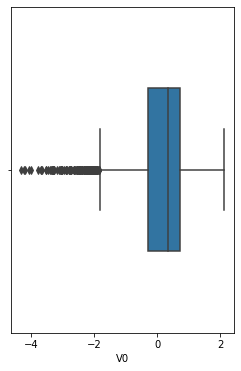

In [11]:
# 可视化展示数据特征、数据分布
# 绘制箱型图
fig = plt.figure(figsize=(4, 6))  # 指定绘图对象的宽度和高度
sns.boxplot(train_data['V0'], orient="v", width=0.5)

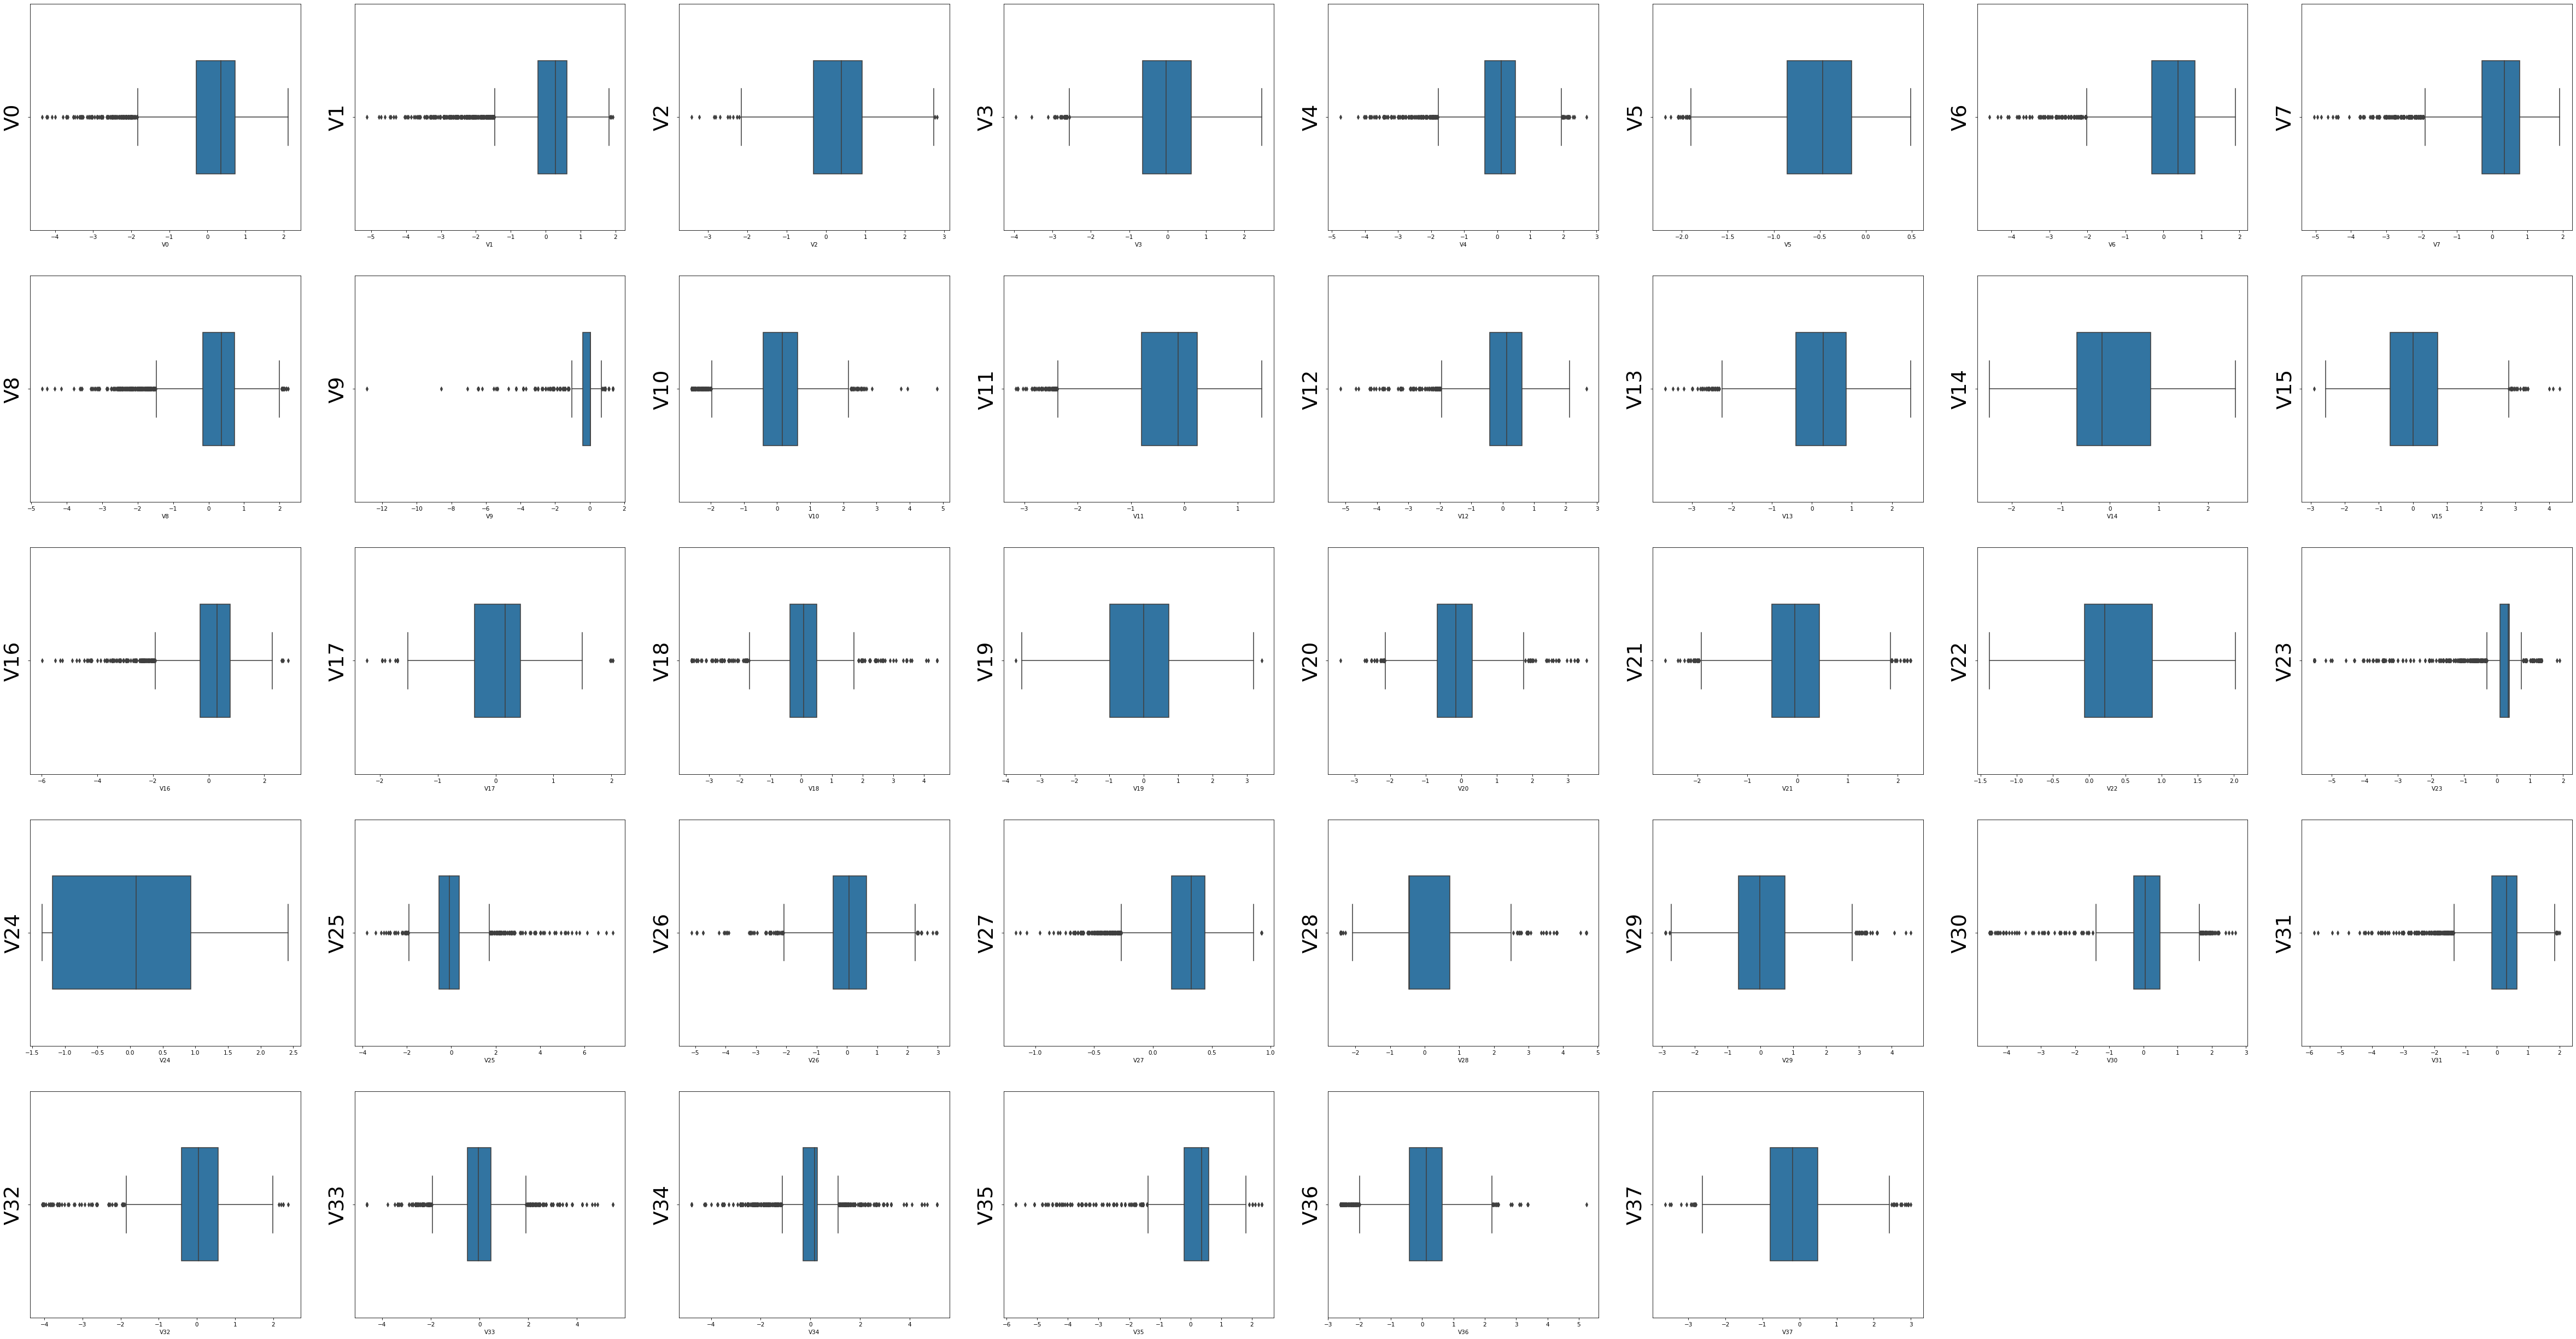

In [14]:
# 绘制训练集中变量V0-V37的箱型图
column = train_data.columns.tolist()[:39] # 列表头
fig = plt.figure(figsize=(80, 60), dpi=75)
for i in range(38):
    plt.subplot(7, 8, i+1) # 7行8列子图
    sns.boxplot(train_data[column[i]], orient='v', width=0.5)
    plt.ylabel(column[i], fontsize=36)
plt.show()

In [15]:
# 从图可以看到有很多偏离较大的异常值，可以考虑移除
# 下面获取异常数据
# functions to detect outlines based on the predictions of a model
def find_outliers(model, X, y, sigma=3):
    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(X, y)
        y_pred = pd.Series(model.predict(X), index=y.index)
    
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    
    # calculate z statistic, define outliers to be where \z\ > sigma
    z = (resid - mean_resid) / std_resid
    outliers = z[abs(z) > sigma].index
    
    # print and plot the results
    print('R2=', model.score(X, y))
    print('mse=', mean_squared_error(y, y_pred))
    print("------------------")
    
    print("mean of residuals:", mean_resid)
    print("std of residuals:", std_resid)
    print("------------------")
    
    print(len(outliers), 'outliers:')
    print(outliers.tolist())
    
    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1, 3, 1)
    plt.plot(y, y_pred, '.')
    plt.plot(y.loc[outliers], y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred')
    
    ax_132 = plt.subplot(1, 3, 2)
    plt.plot(y, y-y_pred, ".")
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred')
    
    ax_133 = plt.subplot(1, 3, 3)
    z.plot.hist(bins=50, ax=ax_133)
    z.loc[outliers].plot.hist(color='r', bins=50, ax=ax_133)
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    
    return outliers

R2= 0.8890858938210386
mse= 0.10734857773123632
------------------
mean of residuals: -2.391131306498779e-17
std of residuals: 0.32769766731934985
------------------
31 outliers:
[321, 348, 376, 777, 884, 1145, 1164, 1310, 1458, 1466, 1484, 1523, 1704, 1874, 1879, 1979, 2002, 2279, 2528, 2620, 2645, 2647, 2667, 2668, 2669, 2696, 2767, 2769, 2807, 2842, 2863]


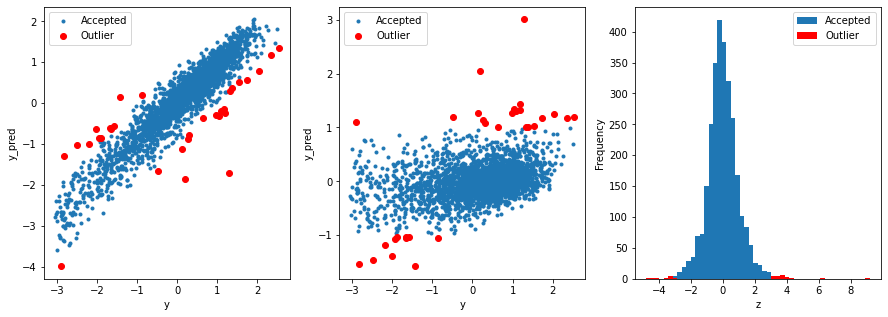

In [16]:
# 通过岭回归模型找出异常值，并绘制其分布，代码如下：
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
X_train = train_data.iloc[:, 0:-1]
y_train = train_data.iloc[:, -1]
outliers = find_outliers(Ridge(), X_train, y_train)

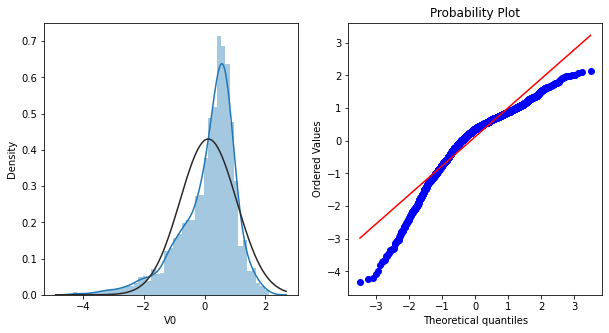

In [17]:
# Q-Q图是指数据的分位数和正态分布的分位数对比参照的图，如果数据符合正态分布，则所有的点都会落在直线上。
# 这里绘制特征变量V0的直方图查看其在训练集中的分布，并绘制Q-Q图查看V0分布是否近似于正态分布。
# 绘制V0的直方图和Q-Q图
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)
sns.distplot(train_data['V0'], fit=stats.norm)
ax = plt.subplot(1, 2, 2)
res = stats.probplot(train_data['V0'], plot=plt)

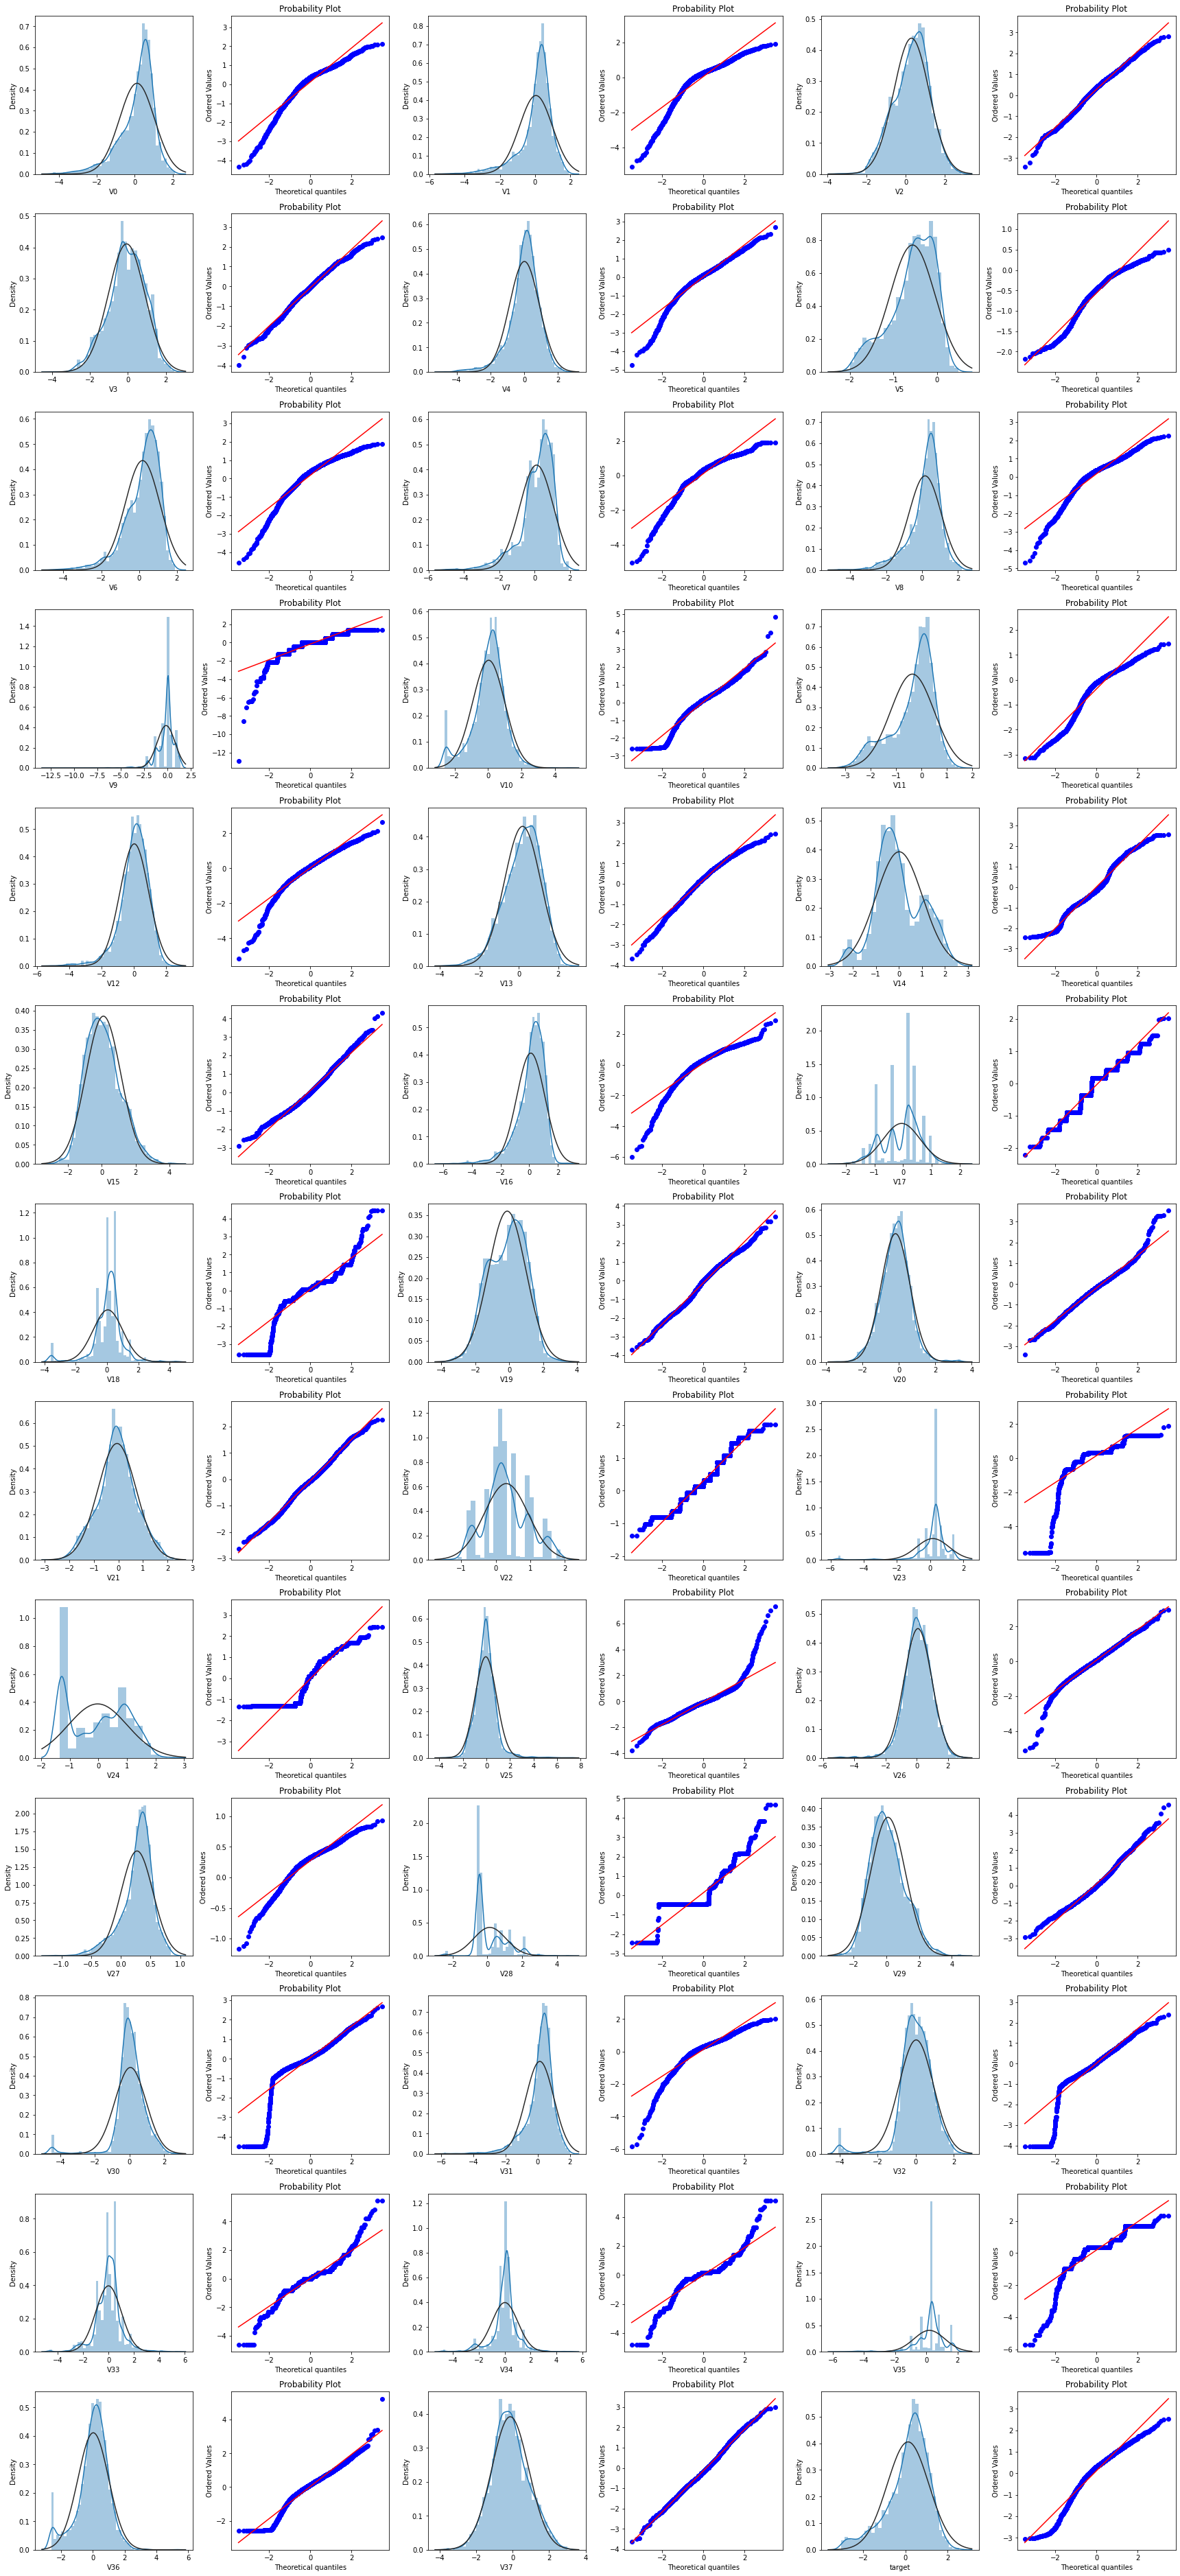

In [19]:
# 可以看到V0不是正态分布
# 下面绘制训练集中所有变量的直方图和Q-Q图
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(4*train_cols, 4*train_rows))

i = 0
for col in train_data.columns:#
    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    sns.distplot(train_data[col], fit=stats.norm)
    
    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    res = stats.probplot(train_data[col], plot=plt)
    
plt.tight_layout()
plt.show()

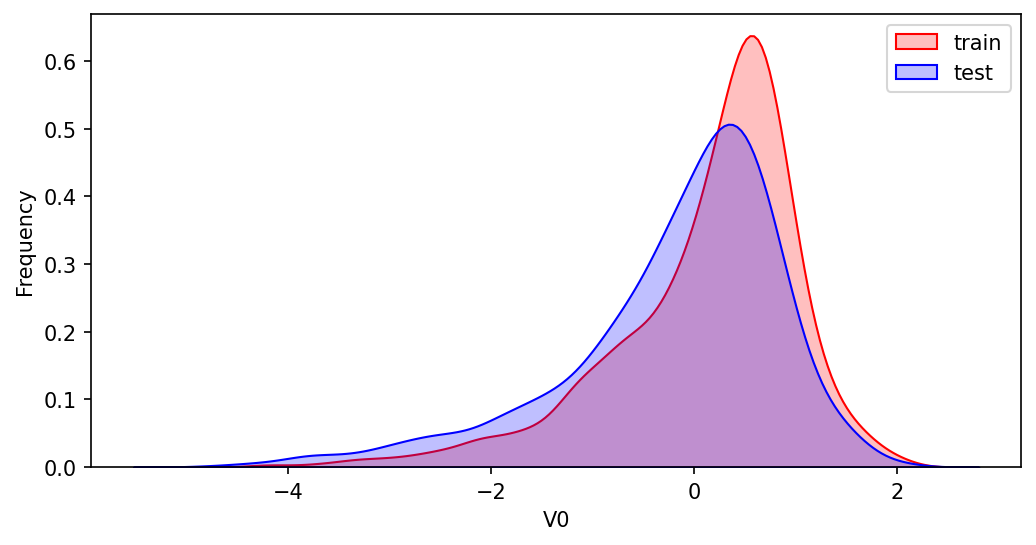

In [22]:
# KDE 可以理解为对直方图的加窗平滑。通过绘制KDE分布图，可以查看并对比训练集和测试集中特征变量的分布情况，发现两个数据集中分布不一致的
# 特征变量。
# 首先对比同一特征变量V0在训练集和测试集中的分布情况，并查看数据分布是否一致。
plt.figure(figsize=(8, 4), dpi=150)
ax = sns.kdeplot(train_data['V0'], color='red', shade=True)
ax = sns.kdeplot(test_data['V0'], color='Blue', shade=True)
ax.set_xlabel('V0')
ax.set_ylabel("Frequency")
ax = ax.legend(["train", "test"])

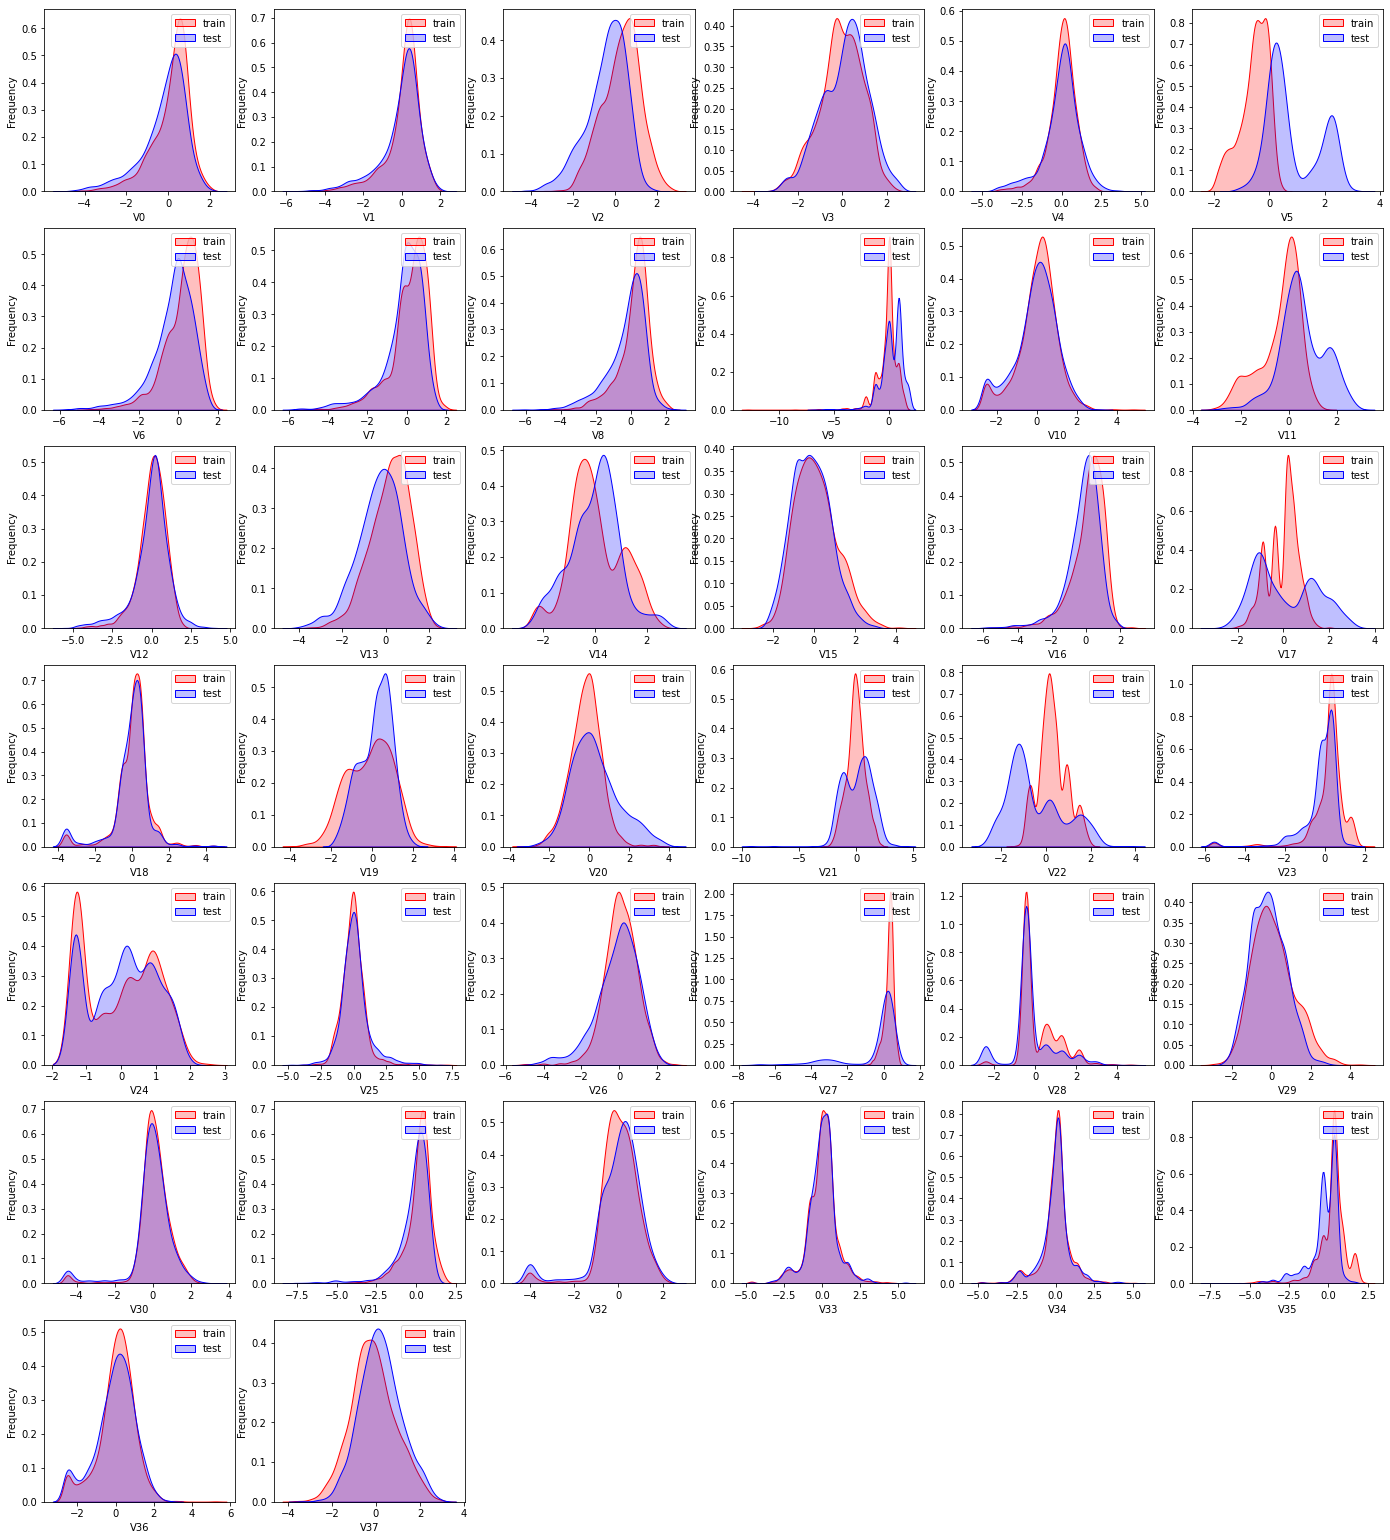

In [21]:
# 可以看到V0在两个数据集中的分布基本一致
# 下面对比所有变量在两个数据集中的KDE分布
dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize=(4*dist_cols, 4*dist_rows))
i = 1
for col in test_data.columns:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(train_data[col], color='red', shade=True)
    ax = sns.kdeplot(test_data[col], color='Blue', shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])
    i += 1
plt.show()

# 会发现特征变量V5,V9,V11,V17,V22,V28在训练集和测试集中的分布不一致，这会导致模型的泛化能力变差，需要删除此类特征。

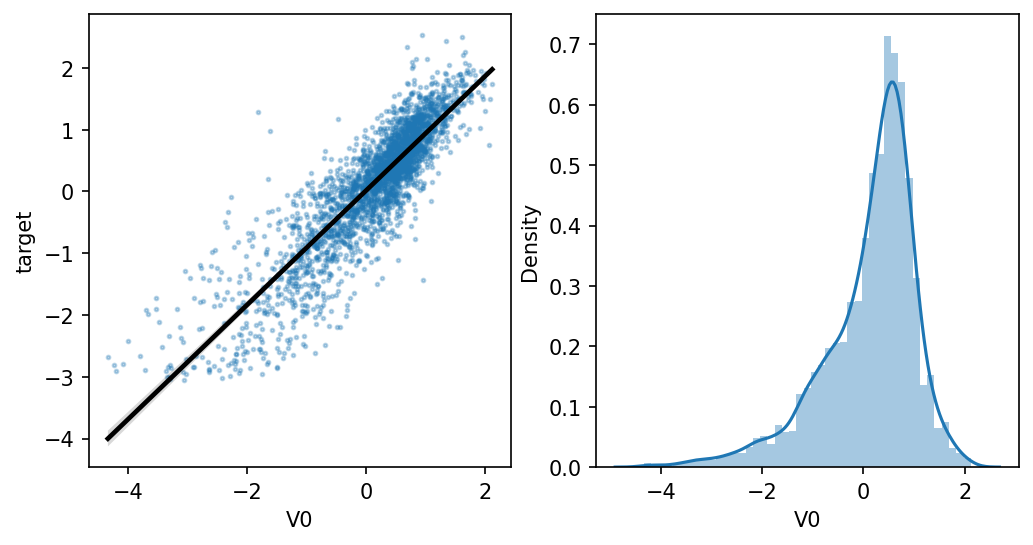

In [28]:
# 线性回归关系图主要用于分析变量之间的线性回归关系。
# 先查看V0与target的线性回归关系。
fcols = 2
frows = 1
plt.figure(figsize=(8, 4), dpi=150)

ax = plt.subplot(1, 2, 1)
sns.regplot(x='V0', y='target', data=train_data, ax=ax, scatter_kws={'marker':'.', 's':3, 'alpha':0.3}, line_kws={'color':'k'})
plt.xlabel('V0')
plt.ylabel('target')

ax=plt.subplot(1, 2, 2)
sns.distplot(train_data['V0'].dropna())
plt.xlabel('V0')

plt.show()

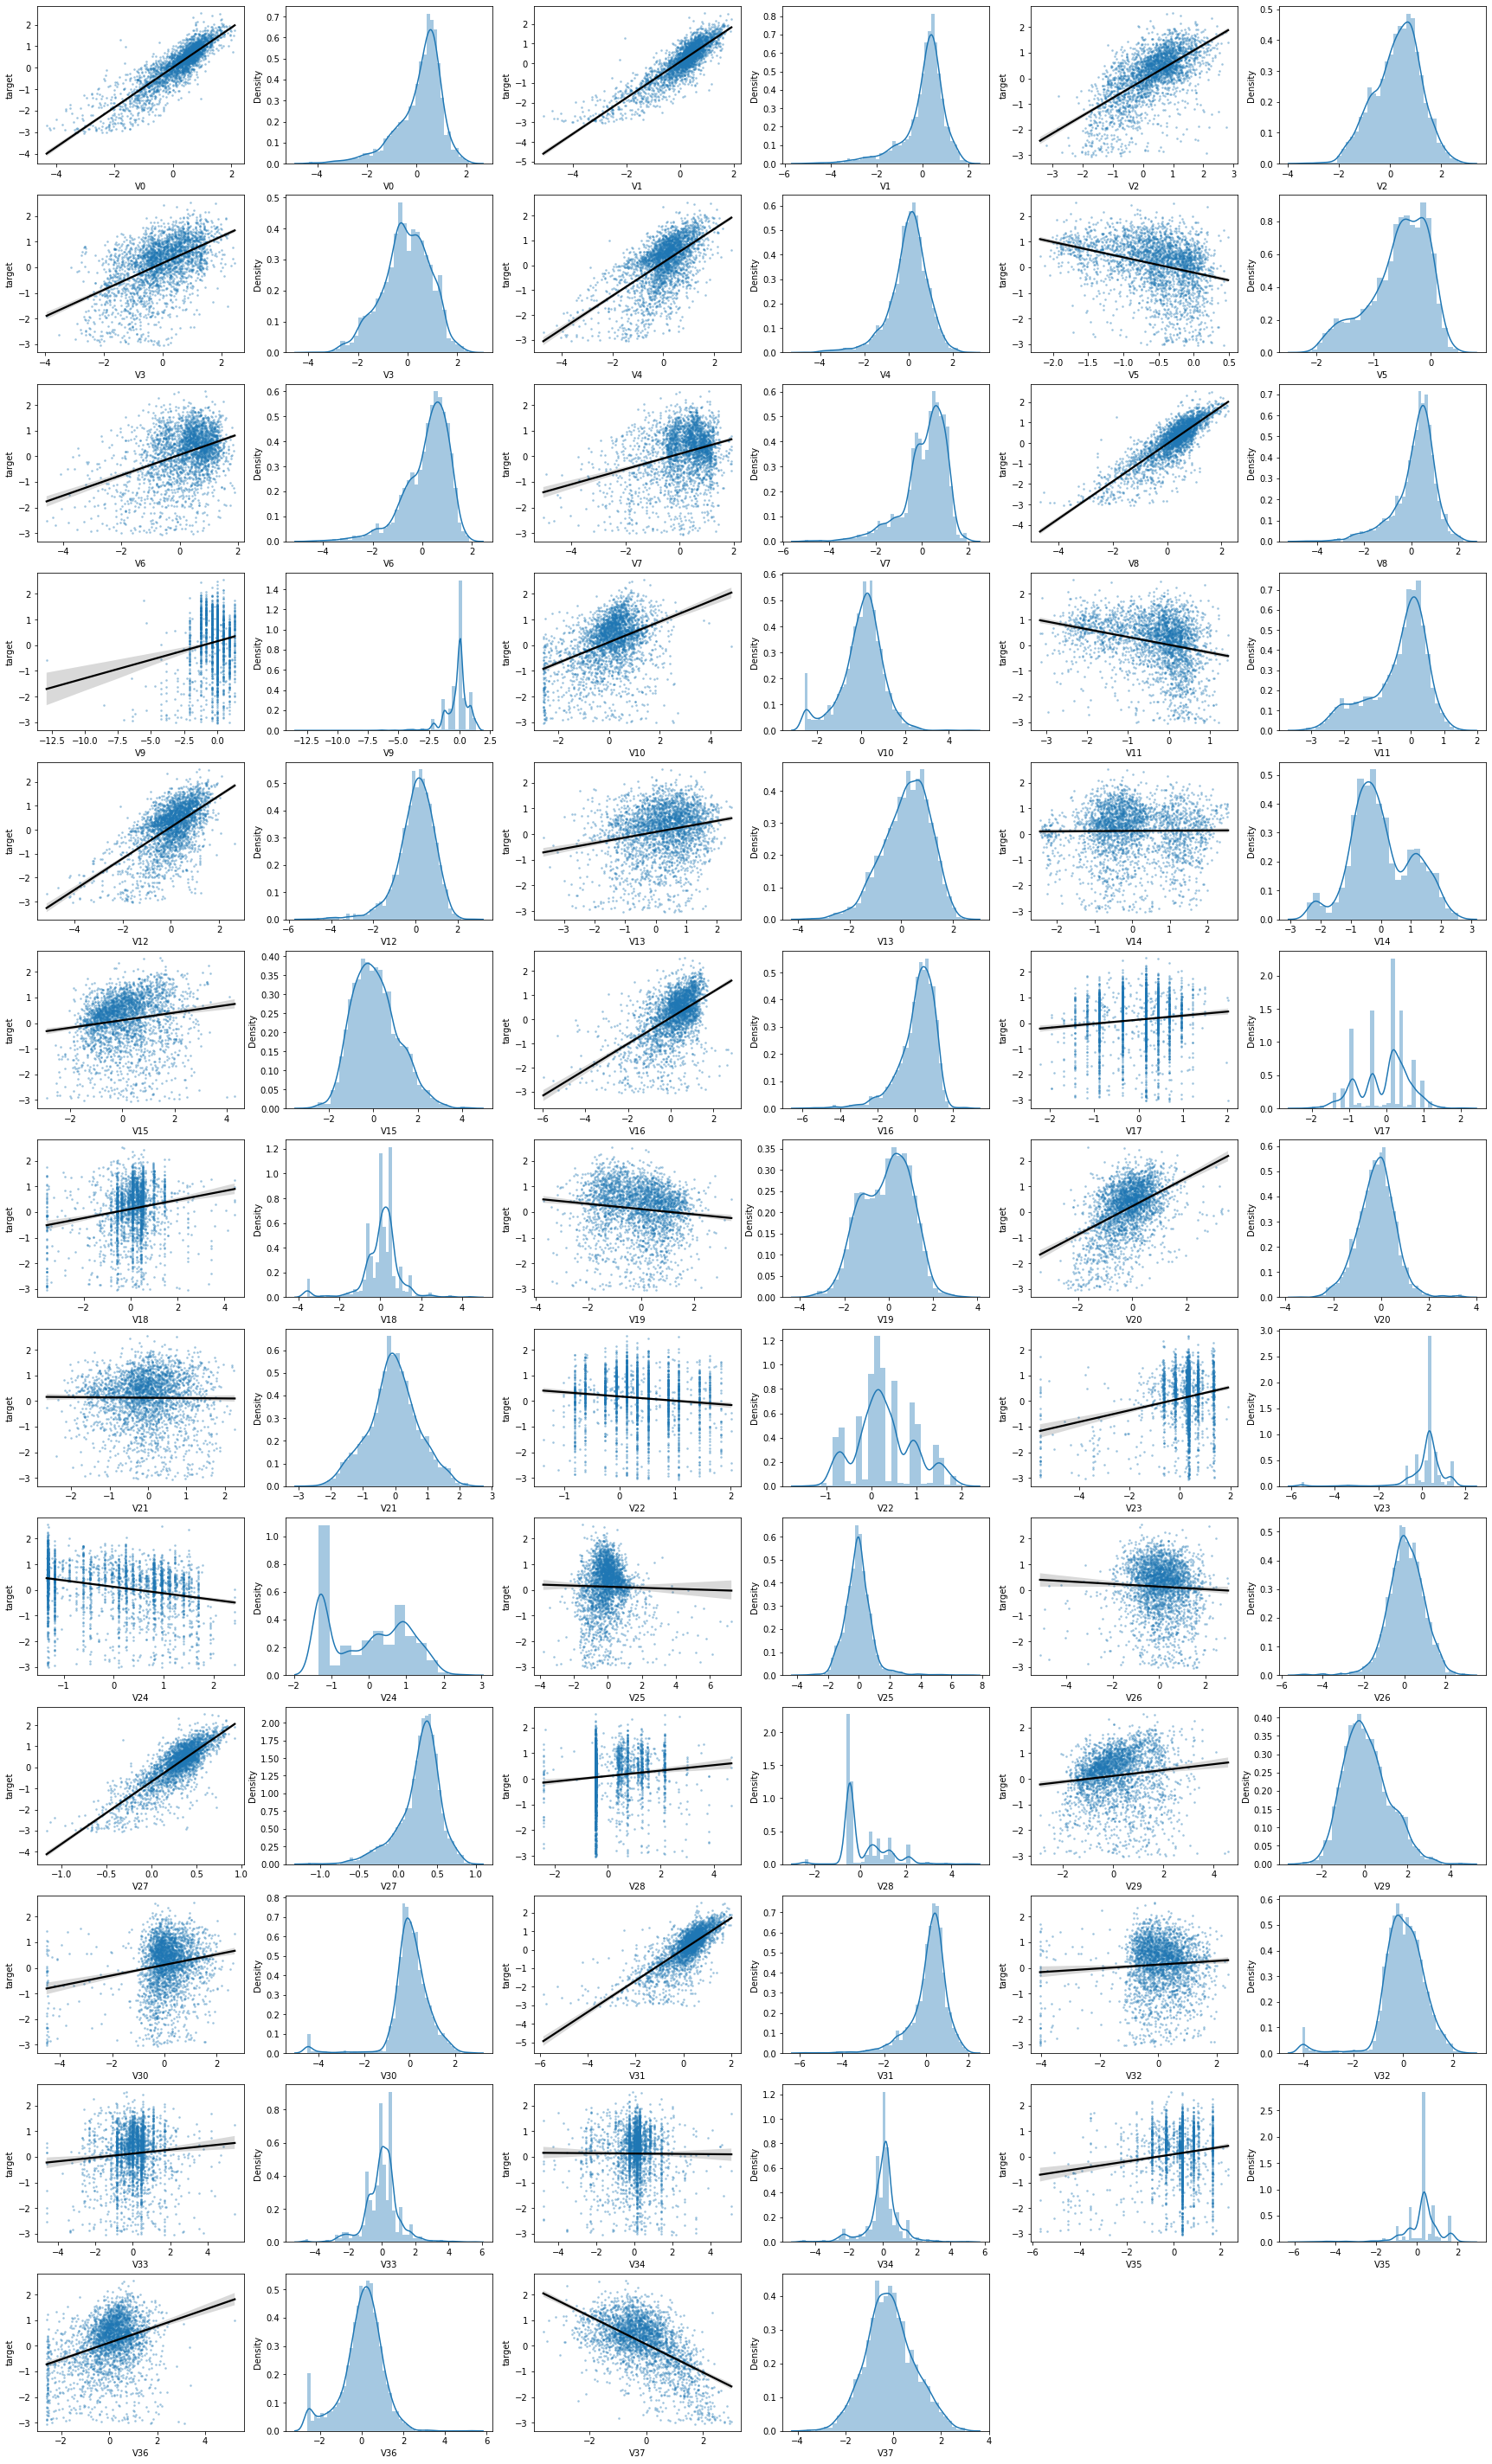

In [29]:
# 查看所有特征变量和target变量的线性回归关系
fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(5*fcols, 4*frows))

i = 0
for col in test_data.columns:
    i += 1
    ax = plt.subplot(frows, fcols, i)
    sns.regplot(x=col, y='target', data=train_data, ax=ax, scatter_kws={'marker':'.', 's':3, 'alpha':0.3}, line_kws={'color':'k'})
    plt.xlabel(col)
    plt.ylabel('target')
    
    i += 1
    ax = plt.subplot(frows, fcols, i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

In [30]:
# 2.2.5查看特征变量的相关性
# 对特征变量的相关性进行分析，可以发现特征变量和目标变量及特征变量之间的关系，为在特征工程中提取特征做准备

# 1. 计算相关性系数
# 先删除训练集和测试集中分布不一致的特征变量，如V5,V9,V11,V17,V22，V28
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
data_train1 = train_data.drop(['V5', 'V9', 'V11', 'V17', 'V22', 'V28'], axis=1)
train_corr = data_train1.corr()
train_corr

V0        V1        V2        V3        V4  ...       V34  \
V0      1.000000  0.908607  0.463643  0.409576  0.781212  ... -0.019342   
V1      0.908607  1.000000  0.506514  0.383924  0.657790  ... -0.029115   
V2      0.463643  0.506514  1.000000  0.410148  0.057697  ... -0.025620   
V3      0.409576  0.383924  0.410148  1.000000  0.315046  ... -0.031898   
V4      0.781212  0.657790  0.057697  0.315046  1.000000  ...  0.028659   
...          ...       ...       ...       ...       ...  ...       ...   
V34    -0.019342 -0.029115 -0.025620 -0.031898  0.028659  ...  1.000000   
V35     0.138933  0.146329  0.043648  0.080034  0.100010  ...  0.233616   
V36     0.231417  0.235299  0.316462  0.324475  0.113609  ... -0.019032   
V37    -0.494076 -0.494043 -0.734956 -0.229613 -0.031054  ... -0.006854   
target  0.873212  0.871846  0.638878  0.512074  0.603984  ... -0.006034   

             V35       V36       V37    target  
V0      0.138933  0.231417 -0.494076  0.873212  
V1      0.146329  0.235299 -0.494043  0.871846  
V2      0.043648  0.316462 -0.734956  0.638878  
V3      0.080034  0.324475 -0.229613  0.512074  
V4      0.100010  0.113609 -0.031054  0.603984  
...          ...       ...       ...       ...  
V34     0.233616 -0.019032 -0.006854 -0.006034  
V35     1.000000  0.025401 -0.077991  0.140294  
V36     0.025401  1.000000 -0.039478  0.319309  
V37    -0.077991 -0.039478  1.000000 -0.565795  
target  0.140294  0.319309 -0.565795  1.000000  

[33 rows x 33 columns]

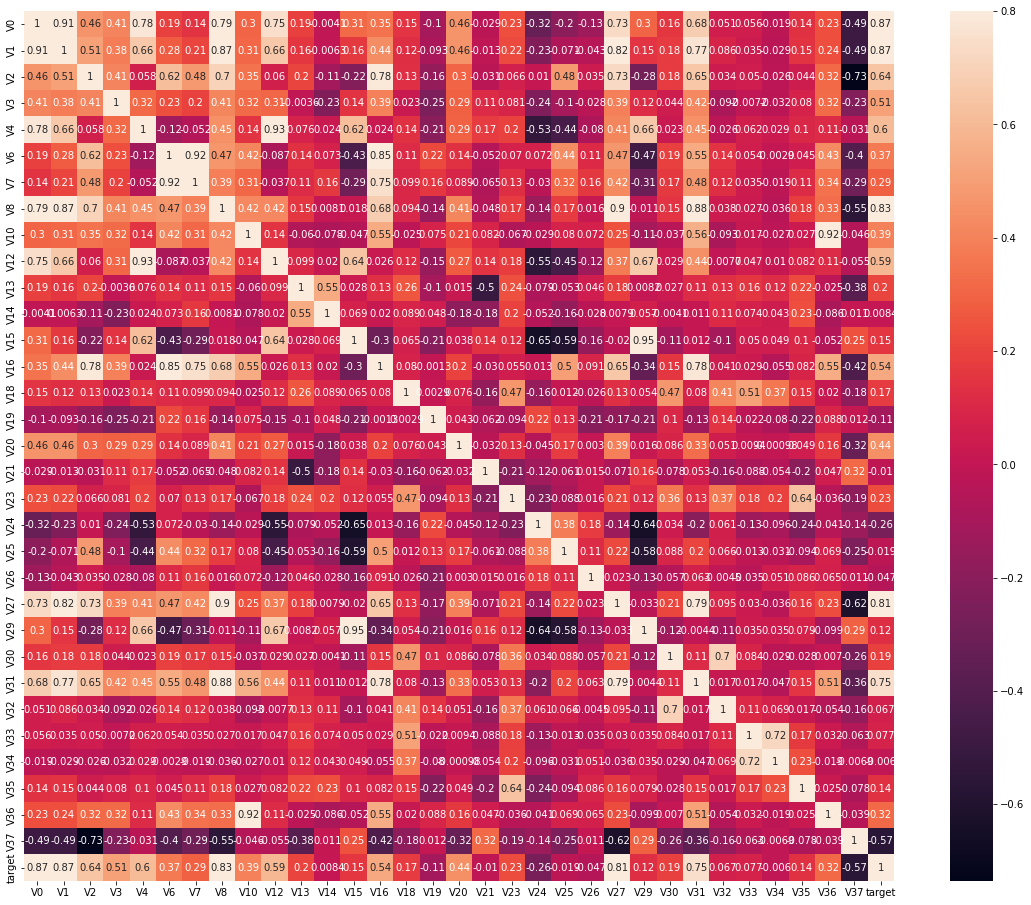

In [31]:
# 为了便于分析，将相关性系数的结果以热力图的形式显示
ax = plt.subplots(figsize=(20, 16)) # 调整画布大小
ax = sns.heatmap(train_corr, vmax=.8, square=True, annot=True) # 画热力图

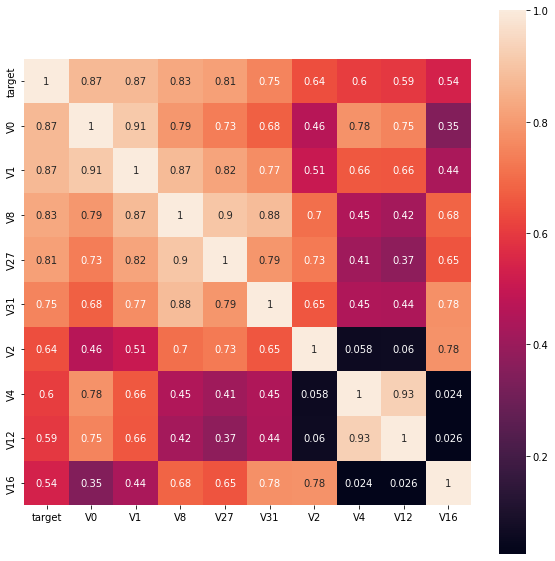

In [33]:
# 根据相关系数筛选特征变量
# 先寻找K个和target变量最相关的特征变量(K=10)
k = 10
cols = train_corr.nlargest(k, 'target')['target'].index

cm = np.corrcoef(train_data[cols].values.T)
hm = plt.subplots(figsize=(10, 10))  # 调整画布大小
hm = sns.heatmap(train_data[cols].corr(), annot=True, square=True)
plt.show()

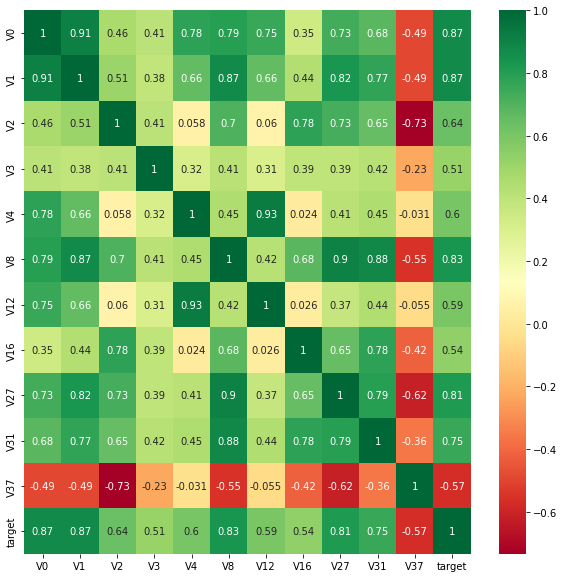

In [34]:
# 找出与target变量相关系数大于0.5的特征变量
threshold = 0.5

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"]) > threshold]
plt.figure(figsize=(10, 10))
g = sns.heatmap(train_data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [37]:
# 用相关系数阈值移除相关特征
# 相关系数矩阵
corr_matrix = data_train1.corr().abs()
drop_col = corr_matrix[corr_matrix["target"] < threshold].index
# 删除
# data_all.drop(drop_col, axis=1, inplace=True)

In [38]:
# 4. Box-Cox变换
# 由于线性回归是基于正态分布的，因此在进行统计分析时，需要将数据转换使其符合正态分布。
# Box-Cox变换可以使线性回归模型在满足线性、正态性、独立性及方差齐性的同时，又不丢失信息。
# 在对数据做Box-Cox变换之后，可以在一定程度上减少不可观察的误差和预测变量的相关性，这有利于线性模型的拟合及分析出特征的相关性
# 在做Box-Cox变换之前，需要对数据进行归一化预处理。归一化时，对数据进行合并操作可以使训练数据和测试数据一致。
drop_columns = ['V5', 'V9', 'V11', 'V17', 'V22', 'V28']
# 合并训练集和测试集的数据
train_x = train_data.drop(['target'], axis=1)

# data_all = pd.concat([train_data, test_data], axis=0, ignore_index=True)
data_all = pd.concat([train_x, test_data])

data_all.drop(drop_columns, axis=1, inplace=True)
data_all.head()

V0     V1     V2     V3     V4  ...    V33    V34    V35    V36    V37
0  0.566  0.016 -0.143  0.407  0.452  ... -4.627 -4.789 -5.101 -2.608 -3.508
1  0.968  0.437  0.066  0.566  0.194  ... -0.843  0.160  0.364 -0.335 -0.730
2  1.013  0.568  0.235  0.370  0.112  ... -0.843  0.160  0.364  0.765 -0.589
3  0.733  0.368  0.283  0.165  0.599  ... -0.843 -0.065  0.364  0.333 -0.112
4  0.684  0.638  0.260  0.209  0.337  ... -0.843 -0.215  0.364 -0.280 -0.028

[5 rows x 32 columns]

In [39]:
# 对合并后的每列数据进行归一化
cols_numeric = list(data_all.columns)

def scale_minmax(col):
    return (col - col.min()) / (col.max() - col.min())

data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax, axis=0)
data_all[cols_numeric].describe()

V0           V1           V2           V3           V4  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.694172     0.721357     0.602300     0.603139     0.523743  ...   
std       0.144198     0.131443     0.140628     0.152462     0.106430  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.626676     0.679416     0.514414     0.503888     0.478182  ...   
50%       0.729488     0.752497     0.617072     0.614270     0.535866  ...   
75%       0.790195     0.799553     0.700464     0.710474     0.585036  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V33          V34          V35          V36          V37  
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  
mean      0.458493     0.483790     0.762873     0.332385     0.545795  
std       0.099095     0.101020     0.102037     0.127456     0.150356  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.409037     0.454490     0.727273     0.270584     0.445647  
50%       0.454518     0.499949     0.800020     0.347056     0.539317  
75%       0.500000     0.511365     0.800020     0.414861     0.643061  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 32 columns]

In [41]:
# 也可以分开对训练数据和测试数据进行归一化处理，不过这种方式需要建立在训练数据和测试数据分布一致的前提下
# 建议在数据量大的时候使用（数据量大，一般分布比较一致），能加快归一化的速度。而数据量较小会存在分布差异较大的情况
# 此时，在数据分析和线下建模中应该将数据统一归一化
train_data_process = train_data[cols_numeric]
train_data_process = train_data_process[cols_numeric].apply(scale_minmax, axis=0)

test_data_process = test_data[cols_numeric]
test_data_process = test_data_process[cols_numeric].apply(scale_minmax, axis=0)

In [ ]:
# 经过变换后，变量分布更接近正态分，布，而且从图中可以更直观地看出特征变量与target变量的线性相关性

# 3 特征工程
## 3.1 特征工程的重要性和处理
特征工程就是从原始数据提取特征的过程，这些特征可以很好地描述数据，并且利用特征建立的模型在未知数据上的性能表现可以达到最优（或者接近最佳性能）。特征工程一般包括特征使用、特征获取、特征处理、特征选择和特征监控

特征工程的处理流程为首先去掉无用特征，接着去除冗余特征，如共线特征，并利用存在的特征、转换特征、内容中的特征以及其他数据源生成新特征，然后对特征进行转换（数值化，类别转换，归一化等），最后对特征进行处理（异常值、最大值、最小值、缺失值等），以符合模型的使用。

简单来说，特征工程的处理一般包括数据预处理、特征处理、特征选择等工作，而特征选择视情况而定，如果特征数量较多，则可以进行特征选择等操作。

## 3.2 数据预处理和特征处理
### 3.2.1 数据预处理
在进行特征提取之前，要对数据进行预处理，具体包括数据采集、数据清洗、数据采样。
#### 1.数据采集
在数据采集之前需要明确几个问题：哪些数据对最后的预测结果有帮助，是否能采集到这类数据，在线上实时计算时数据获取是否快捷。

例如，现在要预测用户对商品的下单情况，或者要给用户做商品推荐，那我们需要采集哪些信息呢？
店家：店铺的评分、店铺类别
商品：商品评分、购买人数、颜色、材质等
用户：历史信息（购买商品的最低价、最高价）、消费能力、停留时间

#### 2.数据清洗
数据清洗也是很重要的一步，大多数时候机器学习算法就是一个加工机器，至于最后的产品如何，取决于原材料的好坏。数据清洗就是要去除“脏”数据，比如某些商品的刷单数据。

那么如何判定数据为“脏”数据呢？
简单属性判定：如身高3米多的人，一个人每个月购买10万的美发卡。
组合或统计属性判定：如号称在美国却一直都是国内的新闻阅读用户
补齐可对应的缺省值：将不可信的样本丢掉，不用缺省值极多的字段。

#### 3.数据采样
数据在采集、清洗过后，正负样本是不均衡的，故要进行数据采样。采样的方法有随机采样和分层抽样。但由于随机取样存在隐患，可能某次随机采样得到的数据很不均匀，因此更多的是根据特征进行分层抽样。
正负样本不平衡的处理方法：
正样本>负样本，且量都特别大的情况：采用下采样（downsampling）方法
正样本>负样本，且量不大的情况，可采用以下方法采集更多数据：上采样(oversampling)，比如图像识别中的镜像和旋转：修改损失函数(loss function)设置样本权重。

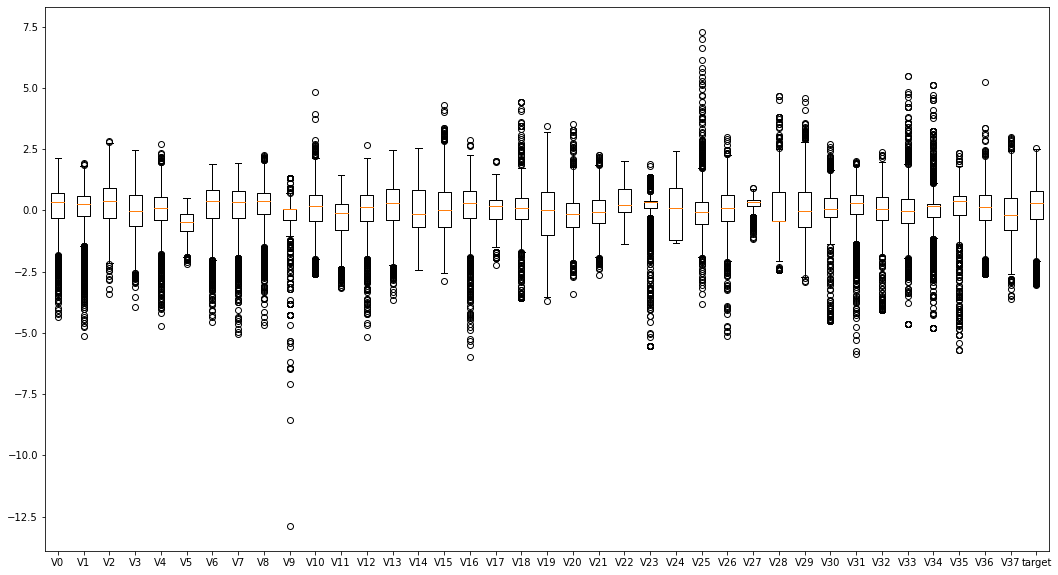

In [50]:
# 赛题特征工程
# 异常值分析，绘制各个特征的箱线图
plt.figure(figsize=(18, 10))
plt.boxplot(x=train_data.values, labels=train_data.columns)
plt.hlines=([-7.5, 7.5], 0, 40)
plt.show()

In [51]:
# 分别删除训练集和测试集中的异常值
train_data = train_data[train_data['V9'] > -7.5]
test_data = test_data[test_data['V9'] > -7.5]
display(train_data.describe())
display(test_data.describe())

V0           V1           V2           V3           V4  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      0.123725     0.056856     0.290340    -0.068364     0.012254  ...   
std       0.927984     0.941269     0.911231     0.970357     0.888037  ...   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000  ...   
25%      -0.292000    -0.224250    -0.310000    -0.652750    -0.385000  ...   
50%       0.359500     0.273000     0.386000    -0.045000     0.109500  ...   
75%       0.726000     0.599000     0.918750     0.623500     0.550000  ...   
max       2.121000     1.918000     2.828000     2.457000     2.689000  ...   

               V34          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  
mean      0.006959     0.198513     0.030099    -0.131957     0.127451  
std       1.003411     0.985058     0.970258     1.015666     0.983144  
min      -4.789000    -5.695000    -2.608000    -3.630000    -3.044000  
25%      -0.290000    -0.199750    -0.412750    -0.798750    -0.347500  
50%       0.160000     0.364000     0.137000    -0.186000     0.314000  
75%       0.273000     0.602000     0.643750     0.493000     0.793750  
max       5.110000     2.324000     5.238000     3.000000     2.538000  

[8 rows x 39 columns]

V0           V1           V2           V3           V4  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean     -0.184404    -0.083912    -0.434762     0.101671    -0.019172  ...   
std       1.073333     1.076670     0.969541     1.034925     1.147286  ...   
min      -4.814000    -5.488000    -4.283000    -3.276000    -4.921000  ...   
25%      -0.664000    -0.451000    -0.978000    -0.644000    -0.497000  ...   
50%       0.065000     0.195000    -0.267000     0.220000     0.118000  ...   
75%       0.549000     0.589000     0.278000     0.793000     0.610000  ...   
max       2.100000     2.120000     1.946000     2.603000     4.475000  ...   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean     -0.011433    -0.009985    -0.296895    -0.046270     0.195735  
std       0.989732     0.995213     0.946896     1.040854     0.940599  
min      -4.627000    -4.789000    -7.477000    -2.608000    -3.346000  
25%      -0.460000    -0.290000    -0.349000    -0.593000    -0.432000  
50%      -0.040000     0.160000    -0.270000     0.083000     0.152000  
75%       0.419000     0.273000     0.364000     0.651000     0.797000  
max       5.465000     5.110000     1.671000     2.861000     3.021000  

[8 rows x 38 columns]

In [52]:
# 对数据进行归一化处理
from sklearn import preprocessing

features_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns
train_data_scaler['target'] = train_data['target']

display(train_data_scaler.describe())
display(test_data_scaler.describe())

V0           V1           V2           V3           V4  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      0.690633     0.735633     0.593844     0.606212     0.639787  ...   
std       0.143740     0.133703     0.145844     0.151311     0.119504  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.626239     0.695703     0.497759     0.515087     0.586328  ...   
50%       0.727153     0.766335     0.609155     0.609855     0.652873  ...   
75%       0.783922     0.812642     0.694422     0.714096     0.712152  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V34          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2884.000000  
mean      0.484489     0.734944     0.336235     0.527608     0.127274  
std       0.101365     0.122840     0.123663     0.153192     0.983462  
min       0.000000     0.000000     0.000000     0.000000    -3.044000  
25%       0.454490     0.685279     0.279792     0.427036    -0.348500  
50%       0.499949     0.755580     0.349860     0.519457     0.313000  
75%       0.511365     0.785260     0.414447     0.621870     0.794250  
max       1.000000     1.000000     1.000000     1.000000     2.538000  

[8 rows x 39 columns]

V0           V1           V2           V3           V4  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.642905     0.715637     0.477791     0.632726     0.635558  ...   
std       0.166253     0.152936     0.155176     0.161379     0.154392  ...   
min      -0.074195    -0.051989    -0.138124     0.106035    -0.024088  ...   
25%       0.568618     0.663494     0.390845     0.516451     0.571256  ...   
50%       0.681537     0.755256     0.504641     0.651177     0.654017  ...   
75%       0.756506     0.811222     0.591869     0.740527     0.720226  ...   
max       0.996747     1.028693     0.858835     1.022766     1.240345  ...   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean      0.457349     0.482778     0.673164     0.326501     0.577034  
std       0.098071     0.100537     0.118082     0.132661     0.141870  
min       0.000000     0.000000    -0.222222     0.000000     0.042836  
25%       0.412901     0.454490     0.666667     0.256819     0.482353  
50%       0.454518     0.499949     0.676518     0.342977     0.570437  
75%       0.500000     0.511365     0.755580     0.415371     0.667722  
max       1.000000     1.000000     0.918568     0.697043     1.003167  

[8 rows x 38 columns]

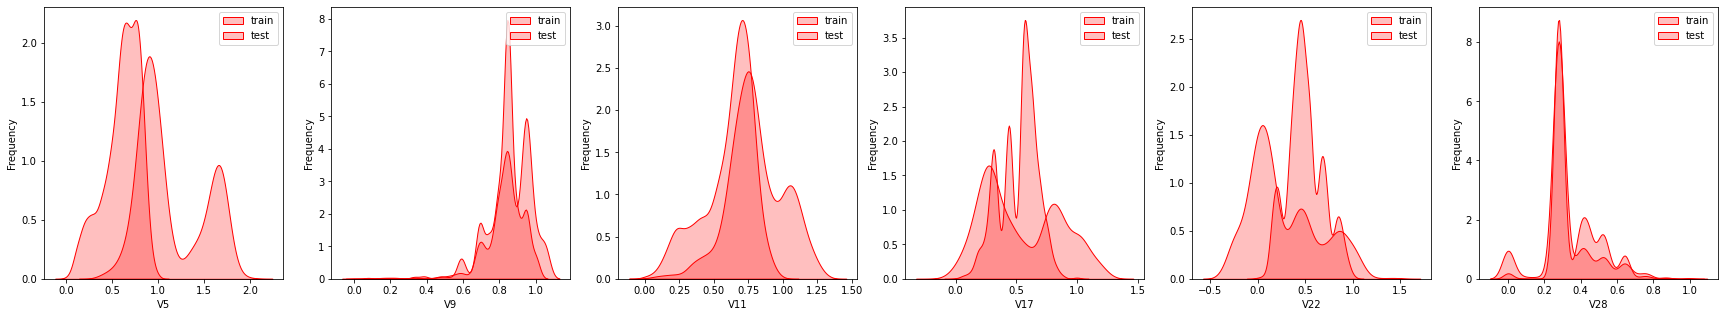

In [54]:
# 查看数据分布
drop_col = 6
drop_row = 1
plt.figure(figsize=(5 * drop_col, 5 * drop_row))

for i, col in enumerate(["V5", "V9", "V11", "V17","V22", "V28"]):
    ax = plt.subplot(drop_row, drop_col, i+1)
    ax = sns.kdeplot(train_data_scaler[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data_scaler[col], color="Red", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])
plt.show()

In [55]:
# PCA处理
from sklearn.decomposition import PCA

# 保持90%信息
pca = PCA(n_components=0.9)
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_90 = pca.transform(test_data_scaler)
new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)
new_train_pca_90['target'] = train_data_scaler['target']
new_train_pca_90.describe()

0             1             2             3             4  \
count  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean  -9.848132e-18 -2.954440e-17  2.462033e-17 -5.416473e-17  8.124709e-17   
std    3.998976e-01  3.500240e-01  2.938631e-01  2.728023e-01  2.077128e-01   
min   -1.071795e+00 -9.429479e-01 -9.948314e-01 -7.103087e-01 -7.703987e-01   
25%   -2.804085e-01 -2.613727e-01 -2.090797e-01 -1.945196e-01 -1.315620e-01   
50%   -1.417104e-02 -1.277241e-02  2.112166e-02 -2.337401e-02 -5.122797e-03   
75%    2.287306e-01  2.317720e-01  2.069571e-01  1.657590e-01  1.281660e-01   
max    1.597730e+00  1.382802e+00  1.010250e+00  1.448007e+00  1.034061e+00   

       ...            12            13            14            15  \
count  ...  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean   ... -1.046364e-17 -6.031981e-17 -9.848132e-18  1.249482e-16   
std    ...  1.193301e-01  1.149758e-01  1.133507e-01  1.019259e-01   
min    ... -4.175153e-01 -4.310613e-01 -4.170535e-01 -3.601627e-01   
25%    ... -7.139961e-02 -7.474073e-02 -7.709743e-02 -6.603914e-02   
50%    ... -4.140670e-03  1.054915e-03 -1.758387e-03 -7.533392e-04   
75%    ...  6.786199e-02  7.574868e-02  7.116829e-02  6.357449e-02   
max    ...  5.156118e-01  4.978126e-01  4.673189e-01  4.570870e-01   

            target  
count  2884.000000  
mean      0.127274  
std       0.983462  
min      -3.044000  
25%      -0.348500  
50%       0.313000  
75%       0.794250  
max       2.538000  

[8 rows x 17 columns]

In [56]:
# 保留16个主成分
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']
new_train_pca_16.describe()

0             1             2             3             4  \
count  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean  -2.954440e-17 -3.939253e-17  4.185456e-17 -4.431659e-17  8.370912e-17   
std    3.998976e-01  3.500240e-01  2.938631e-01  2.728023e-01  2.077128e-01   
min   -1.071795e+00 -9.429479e-01 -9.948314e-01 -7.103087e-01 -7.703980e-01   
25%   -2.804085e-01 -2.613727e-01 -2.090798e-01 -1.945195e-01 -1.315622e-01   
50%   -1.417104e-02 -1.277241e-02  2.112167e-02 -2.337407e-02 -5.122378e-03   
75%    2.287306e-01  2.317720e-01  2.069571e-01  1.657590e-01  1.281661e-01   
max    1.597730e+00  1.382802e+00  1.010250e+00  1.448007e+00  1.034061e+00   

       ...            12            13            14            15  \
count  ...  2.886000e+03  2.886000e+03  2.886000e+03  2.886000e+03   
mean   ... -1.169466e-17 -6.401286e-17 -1.107915e-17  1.298722e-16   
std    ...  1.193301e-01  1.149757e-01  1.133506e-01  1.019257e-01   
min    ... -4.173978e-01 -4.309274e-01 -4.170890e-01 -3.602633e-01   
25%    ... -7.136758e-02 -7.480431e-02 -7.705476e-02 -6.611142e-02   
50%    ... -4.148159e-03  1.040515e-03 -1.774398e-03 -8.330569e-04   
75%    ...  6.790271e-02  7.574483e-02  7.123548e-02  6.352992e-02   
max    ...  5.154836e-01  4.977928e-01  4.672080e-01  4.571181e-01   

            target  
count  2884.000000  
mean      0.127274  
std       0.983462  
min      -3.044000  
25%      -0.348500  
50%       0.313000  
75%       0.794250  
max       2.538000  

[8 rows x 17 columns]

In [75]:
# 线性回归调用方法

# 切分数据集
from sklearn.model_selection import train_test_split
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据为80% 验证数据为20%
train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)

In [79]:
# 使用sklearn调用线性回归模型进行预测
from sklearn.metrics import mean_squared_error # 评价指标

# 从sklearn算法库中导入线性回归模型
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression: ", score)

LinearRegression:  0.2716989128392942


In [90]:
# K近邻回归模型
# 使用sklearn算法库中导入K近邻回归模型算法
from sklearn.neighbors import KNeighborsRegressor
import math
minScore, idx = math.inf, 1
for i in range(1, 20):
    clf = KNeighborsRegressor(n_neighbors=i) # 最近3个
    clf.fit(train_data, train_target)
    test_pred = clf.predict(test_data)
    score = mean_squared_error(test_target, clf.predict(test_data))
    print("KNeighborsRegressor: ", score, " n_neighbors:", i)
    if score < minScore:
        minScore = score
        idx = i
print(minScore, " i:", idx)

KNeighborsRegressor:  0.43077219204152245  n_neighbors: 1
KNeighborsRegressor:  0.28564739489619373  n_neighbors: 2
KNeighborsRegressor:  0.26758239023452524  n_neighbors: 3
KNeighborsRegressor:  0.2704971706314879  n_neighbors: 4
KNeighborsRegressor:  0.2660297158477508  n_neighbors: 5
KNeighborsRegressor:  0.27474923490965014  n_neighbors: 6
KNeighborsRegressor:  0.27794443340865754  n_neighbors: 7
KNeighborsRegressor:  0.27300318049848615  n_neighbors: 8
KNeighborsRegressor:  0.27611612437524036  n_neighbors: 9
KNeighborsRegressor:  0.27410942202422145  n_neighbors: 10
KNeighborsRegressor:  0.27894408192970915  n_neighbors: 11
KNeighborsRegressor:  0.28171665922962325  n_neighbors: 12
KNeighborsRegressor:  0.2870993810732786  n_neighbors: 13
KNeighborsRegressor:  0.29212618791928535  n_neighbors: 14
KNeighborsRegressor:  0.28965811974625144  n_neighbors: 15
KNeighborsRegressor:  0.289426424044388  n_neighbors: 16
KNeighborsRegressor:  0.2881926323379749  n_neighbors: 17
KNeighborsRe

In [91]:
# 决策树回归
# 从sklearn算法库中导入决策树回归算法
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, clf.predict(test_data))
print("DecisionTreeRegressor: ", score)

DecisionTreeRegressor:  0.6021848650519032


In [99]:
# 随机森林是通过集成学习的思想将多棵树集成的一种算法，基本单元是决策树。 回归问题中，随机森林输出所有决策树输出的平均值。
# 从sklearn算法库中导入随机森林回归树模型
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=200) # 200棵树模型
clf.fit(train_data, train_target)
test_pred = clf.predict(test_data)
score = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor: ", score)

RandomForestRegressor:  0.25001115770419546


In [102]:
# LightGB
import lightgbm as lgb

clf = lgb.LGBMRegressor(
    learning_rate=0.01,
    max_depth=-1,
    n_estimators=5000,
    boosting_type='gbdt',
    random_state=2019,
    objective='regression',
)

# 训练模型
clf.fit(X=train_data, y=train_target, eval_metric='MSE', verbose=50)

score = mean_squared_error(test_target, clf.predict(test_data))
print("lightGbm:", score)

lightGbm: 0.2443520254942895


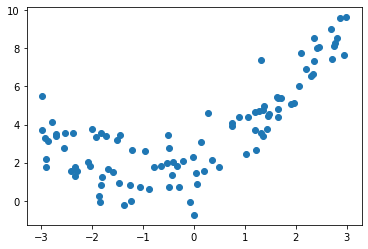

In [104]:
# 模型验证
# 过拟合与欠拟合
# 生成一个数据集并可视化显示
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()


In [105]:
# 下面使用多项式回归拟合，首先封装Pipeline管道，这样便于下一步灵活调整多项式回归模型参数
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([('Poly', PolynomialFeatures(degree=degree)),
                    ('std_scaler', StandardScaler()),
                    ('lin_reg', LinearRegression())])

In [106]:
# 使用Pipeline拟合数据，多项式参数设置为degree=2，进行预测
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)
y2_predict = poly2_reg.predict(X)
# 比较真实值和预测值的均方误差
mean_squared_error(y, y2_predict)


1.0987392142417856

In [109]:
train_data_file = "zhengqi_train.txt"
test_data_file =  "zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')
features_columns = [col for col in train_data.columns if col not in ['target']]

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']
#PCA方法降维
#保留16个主成分
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']
#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

In [110]:
from sklearn.linear_model import SGDRegressor

# 欠拟合情况
clf = SGDRegressor(max_iter=500, tol=1e-2) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)


SGDRegressor train MSE:    0.15143188853819267
SGDRegressor test MSE:    0.15579135708037217


In [112]:
# 过拟合
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13239038801997907
SGDRegressor test MSE:    0.14496326449463626


In [113]:
# 正常拟合
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13429564918723508
SGDRegressor test MSE:    0.14265225558181396


In [114]:
# L2范数正则化
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L2', alpha=0.0001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13394742449110558
SGDRegressor test MSE:    0.14226101982211553


In [115]:
# L1范数正则化
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L1', alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13415699286275645
SGDRegressor test MSE:    0.14270088291595395


In [116]:
# ElasticNet联合L1和L2范数加权正则化
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'elasticnet', l1_ratio=0.9, alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13432155174593263
SGDRegressor test MSE:    0.14271645549883435


In [117]:
# 模型交叉验证
# 简单交叉验证
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)


SGDRegressor train MSE:    0.14153665656531267
SGDRegressor test MSE:    0.1469245708057915


In [118]:
# 5折交叉验证
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 折", "SGDRegressor train MSE:   ", score_train)
    print(k, " 折", "SGDRegressor test MSE:   ", score_test, '\n')  

0  折 SGDRegressor train MSE:    0.15000070909130614
0  折 SGDRegressor test MSE:    0.10589871944727978 

1  折 SGDRegressor train MSE:    0.1336067771674574
1  折 SGDRegressor test MSE:    0.18251078983261776 

2  折 SGDRegressor train MSE:    0.14718459923569477
2  折 SGDRegressor test MSE:    0.1333028074648085 

3  折 SGDRegressor train MSE:    0.14063960509183043
3  折 SGDRegressor test MSE:    0.16362918277958316 

4  折 SGDRegressor train MSE:    0.138060831354769
4  折 SGDRegressor test MSE:    0.1649557828809683 



In [119]:
# 留一法交叉验证
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
num = 100
for k, (train_index, test_index) in enumerate(loo.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 个", "SGDRegressor test MSE:   ", score_test, '\n') 
    if k >= 9:
        break

0  个 SGDRegressor train MSE:    0.14153166858923683
0  个 SGDRegressor test MSE:    0.011073637270966911 

1  个 SGDRegressor train MSE:    0.14102488112618178
1  个 SGDRegressor test MSE:    0.11987621183484994 

2  个 SGDRegressor train MSE:    0.1416307094748285
2  个 SGDRegressor test MSE:    0.039319530016099294 

3  个 SGDRegressor train MSE:    0.14173442463519634
3  个 SGDRegressor test MSE:    0.0037667778329361673 

4  个 SGDRegressor train MSE:    0.14106731573527145
4  个 SGDRegressor test MSE:    0.012149653938745876 

5  个 SGDRegressor train MSE:    0.14157344651964027
5  个 SGDRegressor test MSE:    0.13578433134892584 

6  个 SGDRegressor train MSE:    0.14153718540905458
6  个 SGDRegressor test MSE:    0.024455213519836663 

7  个 SGDRegressor train MSE:    0.14102064717907736
7  个 SGDRegressor test MSE:    0.001031896173109453 

8  个 SGDRegressor train MSE:    0.14162989032887321
8  个 SGDRegressor test MSE:    0.09079902251184394 

9  个 SGDRegressor train MSE:    0.141580472403926

In [120]:
# 留P法交叉验证
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=10)
num = 100
for k, (train_index, test_index) in enumerate(lpo.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 10个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 10个", "SGDRegressor test MSE:   ", score_test, '\n') 
    if k >= 9:
        break

0  10个 SGDRegressor train MSE:    0.1420079790083375
0  10个 SGDRegressor test MSE:    0.0491928692771872 

1  10个 SGDRegressor train MSE:    0.14196449138860298
1  10个 SGDRegressor test MSE:    0.04523529806178177 

2  10个 SGDRegressor train MSE:    0.14194382936878383
2  10个 SGDRegressor test MSE:    0.046713966156924726 

3  10个 SGDRegressor train MSE:    0.14194908676549592
3  10个 SGDRegressor test MSE:    0.05453305362530213 

4  10个 SGDRegressor train MSE:    0.14186604564694183
4  10个 SGDRegressor test MSE:    0.06910202385188749 

5  10个 SGDRegressor train MSE:    0.14189568949352555
5  10个 SGDRegressor test MSE:    0.044979021642086274 

6  10个 SGDRegressor train MSE:    0.1419637819202914
6  10个 SGDRegressor test MSE:    0.049496713884605796 

7  10个 SGDRegressor train MSE:    0.14192955866236723
7  10个 SGDRegressor test MSE:    0.05300159750697836 

8  10个 SGDRegressor train MSE:    0.1412873539804263
8  10个 SGDRegressor test MSE:    0.0461456601693908 

9  10个 SGDRegressor t

In [121]:
# 模型超参空间及调参
# 穷举网格搜索
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
              'n_estimators':[50, 100, 200],
              'max_depth':[1, 2, 3]
        }


clf = GridSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor GridSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor GridSearchCV test MSE:    0.2538124868524681


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [122]:
# 随即参数优化
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
              'n_estimators':[50, 100, 200, 300],
              'max_depth':[1, 2, 3, 4, 5]
        }


clf = RandomizedSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor RandomizedSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor RandomizedSearchCV test MSE:    0.1956539887300383


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [123]:
# LGB调参 采用网格搜索方法调参
clf = lgb.LGBMRegressor(num_leaves=31)

parameters = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

clf = GridSearchCV(clf, parameters, cv=5)
clf.fit(train_data, train_target)

print('Best parameters found by grid search are:', clf.best_params_)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("LGBMRegressor RandomizedSearchCV test MSE:   ", score_test)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 40}
LGBMRegressor RandomizedSearchCV test MSE:    0.15130515929037072


In [126]:
# LGB线下验证
# 包含数据建模、5折交叉验证、划分数据、对LGB模型进行训练、计算MSE评价性能等流程

train_data2 = pd.read_csv('zhengqi_train.txt',sep='\t')
test_data2 = pd.read_csv('zhengqi_test.txt',sep='\t')

train_data2_f = train_data2[test_data2.columns].values
train_data2_target = train_data2['target'].values

# lgb 模型
from sklearn.model_selection  import KFold
import lightgbm as lgb
import numpy as np


# 5折交叉验证
Folds=5
kf = KFold(n_splits=Folds, random_state=2019, shuffle=True)
# 记录训练和预测MSE
MSE_DICT = {
    'train_mse':[],
    'test_mse':[]
}

# 线下训练预测
for i, (train_index, test_index) in enumerate(kf.split(train_data2_f)):
    # lgb树模型
    lgb_reg = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=5000,
        boosting_type='gbdt',
        random_state=2019,
        objective='regression',
    )
   
    # 切分训练集和预测集
    X_train_KFold, X_test_KFold = train_data2_f[train_index], train_data2_f[test_index]
    y_train_KFold, y_test_KFold = train_data2_target[train_index], train_data2_target[test_index]
    
    # 训练模型
#     reg.fit(X_train_KFold, y_train_KFold)
    lgb_reg.fit(
            X=X_train_KFold,y=y_train_KFold,
            eval_set=[(X_train_KFold, y_train_KFold),(X_test_KFold, y_test_KFold)],
            eval_names=['Train','Test'],
            early_stopping_rounds=100,
            eval_metric='MSE',
            verbose=50
        )


    # 训练集预测 测试集预测
    y_train_KFold_predict = lgb_reg.predict(X_train_KFold,num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(X_test_KFold,num_iteration=lgb_reg.best_iteration_) 
    
    print('第{}折 训练和预测 训练MSE 预测MSE'.format(i))
    train_mse = mean_squared_error(y_train_KFold_predict, y_train_KFold)
    print('------\n', '训练MSE\n', train_mse, '\n------')
    test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
    print('------\n', '预测MSE\n', test_mse, '\n------\n')
    
    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
print('------\n', '训练MSE\n', MSE_DICT['train_mse'], '\n', np.mean(MSE_DICT['train_mse']), '\n------')
print('------\n', '预测MSE\n', MSE_DICT['test_mse'], '\n', np.mean(MSE_DICT['test_mse']), '\n------')

[50]	Train's l2: 0.428458	Test's l2: 0.466965
[100]	Train's l2: 0.221807	Test's l2: 0.263431
[150]	Train's l2: 0.135301	Test's l2: 0.183515
[200]	Train's l2: 0.0958737	Test's l2: 0.148825
[250]	Train's l2: 0.075642	Test's l2: 0.133187
[300]	Train's l2: 0.0629311	Test's l2: 0.125237
[350]	Train's l2: 0.054088	Test's l2: 0.121321
[400]	Train's l2: 0.0473551	Test's l2: 0.118307
[450]	Train's l2: 0.0418952	Test's l2: 0.116414
[500]	Train's l2: 0.0375119	Test's l2: 0.114863
[550]	Train's l2: 0.0337062	Test's l2: 0.114002
[600]	Train's l2: 0.0303868	Test's l2: 0.112781
[650]	Train's l2: 0.02756	Test's l2: 0.11207
[700]	Train's l2: 0.0250506	Test's l2: 0.111287
[750]	Train's l2: 0.0228758	Test's l2: 0.110742
[800]	Train's l2: 0.0209081	Test's l2: 0.1103
[850]	Train's l2: 0.0191684	Test's l2: 0.109946
[900]	Train's l2: 0.0176066	Test's l2: 0.109759
[950]	Train's l2: 0.0162243	Test's l2: 0.109423
[1000]	Train's l2: 0.014984	Test's l2: 0.109105
[1050]	Train's l2: 0.0138415	Test's l2: 0.108795
[1

第4折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.007971416523938925 
------
------
 预测MSE
 0.09921237825179019 
------

------
 训练MSE
 [0.0014891170026875994, 0.0072898318628357595, 0.0204510246350711, 0.009355847634266074, 0.007971416523938925] 
 0.009311447531759892 
------
------
 预测MSE
 [0.10539809256060709, 0.13269660321638646, 0.10111932554955037, 0.10682190098205552, 0.09921237825179019] 
 0.10904966011207792 
------


Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

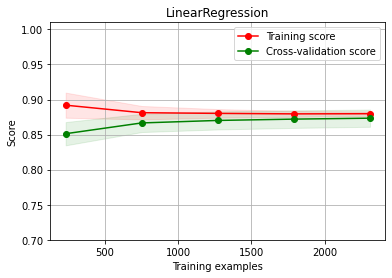

In [128]:
# 绘制数据的学习曲线，使用模型SGDRegressor
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X = train_data2[test_data2.columns].values
y = train_data2['target'].values


title = "LinearRegression"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = model_selection.ShuffleSplit(n_splits=100,
                                   test_size=0.2, random_state=0)

estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)


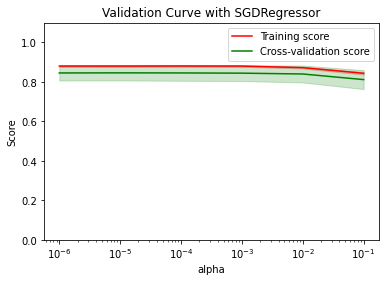

In [129]:
# 验证曲线

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve

X = train_data2[test_data2.columns].values
y = train_data2['target'].values
# max_iter=1000, tol=1e-3, penalty= 'L1', alpha=0.00001

param_range = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
train_scores, test_scores = validation_curve(
    SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L1'), X, y, param_name="alpha", param_range=param_range,
    cv=10, scoring='r2', n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SGDRegressor")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

In [131]:
# 特征优化
# 导入数据
import pandas as pd
train_data_file = "zhengqi_train.txt"
test_data_file = "zhengqi_test.txt"
train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

# 定义特征构造方法
epsilon = 1e-5
# 组交叉特征，可以自行定义，如增加x*x/y，log(x)/y等
func_dict = {
    'add': lambda x, y: x + y,
    'mins': lambda x, y : x - y,
    'div': lambda x, y: x / (y + epsilon),
    'multi': lambda x, y: x*y
}

In [132]:
# 特征构造函数
def auto_features_make(train_data, test_data, func_dict, col_list):
    train_data, test_data = train_data.copy(), test_data.copy()
    for col_i in col_list:
        for col_j in col_list:
            for func_name, func in func_dict.items():
                for data in [train_data, test_data]:
                    func_features = func(data[col_i], data[col_j])
                    col_func_features = '-'.join([col_i, func_name, col_j])
                    data[col_func_features] = func_features
    return train_data, test_data

In [133]:
# 特征降维处理，先构造新特征
train_data2, test_data2 = auto_features_make(train_data, test_data, func_dict, col_list=test_data.columns)

from sklearn.decomposition import PCA

# PCA方法降维
pca = PCA(n_components=500)
train_data2_pca = pca.fit_transform(train_data2.iloc[:, 0:-1])
test_data2_pca = pca.transform(test_data2)
train_data2_pca = pd.DataFrame(train_data2_pca)
test_data2_pca = pd.DataFrame(test_data2_pca)
train_data2_pca['target'] = train_data2['target']
X_train2 = train_data2[test_data2.columns].values
y_train = train_data2['target']

In [137]:
# ls_validation i
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import numpy as np

# 5折交叉验证
Folds=5
kf = KFold(n_splits=Folds, random_state=2019, shuffle=True)
# 记录训练和预测MSE
MSE_DICT = {
    'train_mse':[],
    'test_mse':[]
}

# 线下训练预测
for i, (train_index, test_index) in enumerate(kf.split(X_train2)):
    # lgb树模型
    lgb_reg = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=5000,
        boosting_type='gbdt',
        random_state=2019,
        objective='regression',
    )
   
    # 切分训练集和预测集
    X_train_KFold, X_test_KFold = X_train2[train_index], X_train2[test_index]
    y_train_KFold, y_test_KFold = y_train[train_index], y_train[test_index]
    
    # 训练模型
    lgb_reg.fit(
            X=X_train_KFold,y=y_train_KFold,
            eval_set=[(X_train_KFold, y_train_KFold),(X_test_KFold, y_test_KFold)],
            eval_names=['Train','Test'],
            early_stopping_rounds=100,
            eval_metric='MSE',
            verbose=50
        )


    # 训练集预测 测试集预测
    y_train_KFold_predict = lgb_reg.predict(X_train_KFold,num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(X_test_KFold,num_iteration=lgb_reg.best_iteration_) 
    
    print('第{}折 训练和预测 训练MSE 预测MSE'.format(i))
    train_mse = mean_squared_error(y_train_KFold_predict, y_train_KFold)
    print('------\n', '训练MSE\n', train_mse, '\n------')
    test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
    print('------\n', '预测MSE\n', test_mse, '\n------\n')
    
    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
print('------\n', '训练MSE\n', MSE_DICT['train_mse'], '\n', np.mean(MSE_DICT['train_mse']), '\n------')
print('------\n', '预测MSE\n', MSE_DICT['test_mse'], '\n', np.mean(MSE_DICT['test_mse']), '\n------')

[50]	Train's l2: 0.413149	Test's l2: 0.454926
[100]	Train's l2: 0.198054	Test's l2: 0.246445
[150]	Train's l2: 0.108942	Test's l2: 0.16496
[200]	Train's l2: 0.068339	Test's l2: 0.132002
[250]	Train's l2: 0.0478166	Test's l2: 0.117826
[300]	Train's l2: 0.0357877	Test's l2: 0.111144
[350]	Train's l2: 0.0279208	Test's l2: 0.10731
[400]	Train's l2: 0.0224493	Test's l2: 0.105219
[450]	Train's l2: 0.018293	Test's l2: 0.103438
[500]	Train's l2: 0.0150641	Test's l2: 0.102189
[550]	Train's l2: 0.0125489	Test's l2: 0.101718
[600]	Train's l2: 0.0105281	Test's l2: 0.10117
[650]	Train's l2: 0.00886464	Test's l2: 0.100886
[700]	Train's l2: 0.0075079	Test's l2: 0.100629
[750]	Train's l2: 0.00639249	Test's l2: 0.100624
[800]	Train's l2: 0.00546952	Test's l2: 0.100569
[850]	Train's l2: 0.00469734	Test's l2: 0.100479
[900]	Train's l2: 0.00404382	Test's l2: 0.100378
[950]	Train's l2: 0.00349094	Test's l2: 0.1003
[1000]	Train's l2: 0.00302518	Test's l2: 0.100273
[1050]	Train's l2: 0.00263288	Test's l2: 0.

[3600]	Train's l2: 5.94181e-05	Test's l2: 0.103177
[3650]	Train's l2: 5.67068e-05	Test's l2: 0.103173
[3700]	Train's l2: 5.41368e-05	Test's l2: 0.103167
[3750]	Train's l2: 5.16917e-05	Test's l2: 0.103164
[3800]	Train's l2: 4.93718e-05	Test's l2: 0.103159
[3850]	Train's l2: 4.71611e-05	Test's l2: 0.103154
[3900]	Train's l2: 4.50635e-05	Test's l2: 0.103152
[3950]	Train's l2: 4.30614e-05	Test's l2: 0.103146
[4000]	Train's l2: 4.11514e-05	Test's l2: 0.10314
[4050]	Train's l2: 3.933e-05	Test's l2: 0.103139
[4100]	Train's l2: 3.75925e-05	Test's l2: 0.103132
[4150]	Train's l2: 3.59319e-05	Test's l2: 0.103129
[4200]	Train's l2: 3.43545e-05	Test's l2: 0.103125
[4250]	Train's l2: 3.28513e-05	Test's l2: 0.103122
[4300]	Train's l2: 3.14182e-05	Test's l2: 0.103117
[4350]	Train's l2: 3.00505e-05	Test's l2: 0.103115
[4400]	Train's l2: 2.87457e-05	Test's l2: 0.103113
[4450]	Train's l2: 2.74945e-05	Test's l2: 0.103108
[4500]	Train's l2: 2.62999e-05	Test's l2: 0.103104
[4550]	Train's l2: 2.51647e-05	Tes

In [156]:
X_test2 = test_data2[test_data2.columns].values
X_test2

array([[ 0.368     ,  0.38      , -0.225     , ...,  0.        ,
         0.99997423,  0.150544  ],
       [ 0.148     ,  0.489     , -0.247     , ...,  0.        ,
         0.99990386,  0.010816  ],
       [-0.166     , -0.062     , -0.311     , ...,  0.        ,
         0.99998243,  0.323761  ],
       ...,
       [-2.615     , -3.564     , -3.402     , ...,  0.        ,
         0.9999938 ,  2.598544  ],
       [-2.661     , -3.646     , -3.271     , ...,  0.        ,
         0.99999301,  2.047761  ],
       [-2.321     , -3.037     , -3.214     , ...,  0.        ,
         0.99999497,  3.952144  ]])

In [163]:
y_train_KFold_predict = lgb_reg.predict(X_train2,num_iteration=lgb_reg.best_iteration_)
#y_test_KFold_predict = lgb_reg.predict(X_test_KFold,num_iteration=lgb_reg.best_iteration_) 
train_mse = mean_squared_error(y_train_KFold_predict, y_train)
print('------\n', '训练MSE\n', train_mse, '\n------')
true_test_predict = lgb_reg.predict(test_data2,num_iteration=lgb_reg.best_iteration_)
#test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
#print('------\n', '预测MSE\n', test_mse, '\n------\n')

------
 训练MSE
 0.021316372481971574 
------


In [161]:
out_file = open("zhengqi_output1.txt", "w")
for i in true_test_predict:
    out_file.write(str(i) + "\n")
out_file.close()